# Sistema de Predição do Diagnóstico de Câncer de Mama Utilizando o Classificador Ingênuo de Bayes (Näive Bayes)

## Centro de Informática
## Universidade Federal de Pernambuco
## Equipe:
*   Alexandre Burle (aqb@cin.ufpe.br)
*   Lucas Morais (lma6@cin.ufpe.br)
*   Marco Aurélio (mafs3@cin.ufpe.br)
*   Matheus Andrade (mvtna@cin.ufpe.br)


---






## Objetivo
O objetivo deste projeto acâdemico é apresentar o desenvolvimento e a análise de um sistema de previsão de diagnóstico de câncer de mama baseado em um Classificador Ingênuo de Bayes utilizando o conjunto de dados [*Breast Cancer Wisconsin (Diagnostic) Data Set*](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29), criado por pesquisadores da Universidade de Wisconsin e distribuído no repositório de aprendizagem de máquina da Universidade da Califórnia em Irvine (UCI).

O modelo proposto neste documento será comparado com o [Classificador Ingênuo de Bayes fornecido pela biblioteca de código *scikit-learn*](https://www.google.com/search?client=safari&rls=en&q=scikit+learn+naive+nayes&ie=UTF-8&oe=UTF-8), de acordo com as métricas de Acurácia, Precisão, Recall e F1-Score (balanceamento entre precisão e recall), cujas formulações são definidas a seguir.

\begin{equation}
    Acur\acute{a}cia = \frac{TP + TF}{TP + TF + FP + FN}
\end{equation}
<br />
\begin{equation}
    Precis\tilde{a}o = \frac{TP}{TP + FP}
\end{equation}
<br />
\begin{equation}
    Recall = \frac{TP}{TP + FN}
\end{equation}
<br />
\begin{equation}
    F1-Score = \frac{2TP}{2TP + FP + FN}
\end{equation}


Sendo
* **Verdadeiro Positivo (TP)**: Representam as predições em que o modelo indicou corretamente um diagnóstico positivo para câncer;
* **Verdadeiro Negativo (TN)**: Representam as predições que o modelo indicou corretamente um diagnóstico negativo para câncer;
* **Falso Positivo (FP)**: Representam as predições em que o modelo indicou incorretamente um diagnóstico positivo de câncer;    
* **Falso Negativo (FN)**: Representam as predições em que o modelo indicou incorretamente um diagnóstico positivo de câncer.





# Bibliotecas para Tratamento dos Dados e para Análise Estatística

* A biblioteca `Pandas` será utilizada para o carregamento e manipulação dos dados;
* A biblioteca `NumPy` será utilizada para manipulação dos dados multimensionais;
* A biblioteca `Seaborn` será utilizada para apresentação visual dos gráficos de distribuição das features do conjunto de dados;
* O módulo `stats` presente na biblioteca `scipy` será utilizado para uso de funções estatísticas;
* A biblioteca `matplotLib` será utilizada para apresentação visual dos gráficos simples do conjunto de dados.



In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

# Análise Exploratória dos Dados
A fase inicial do desenvolvimento deste projeto se baseia na análise exploratória dos dados. É interessante visualizar e entender como os dados estão estruturados de modo que seja possível pensarmos em estratégias de manipulação e compreendermos quais experimentos seremos capazes de desempenhar no nosso conjunto de dados.


## Importação do Dataset

Nesse projeto, utilizamos a base de dados [*Breast Cancer Wisconsin (Diagnostic) Data Set*](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29).

Esse dataset é um subconjunto dos dados presentes em [*Breast Cancer Wisconsin (Original) Data Set*](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29), o qual contém dados relacionados ao diagnóstico (o qual estamos interessados) e dados referentes ao prognóstico (o qual não nos interessa para este estudo). Os dados referentes ao diagnóstico se encontra no arquivo `wdbc.data` fornecido pelo repositório.

Após a importação do dataset, realizamos um tratamento do DataFrame, visto que as colunas não estavam nomeadas. Assim, inserimos o nome de cada atributos, sendo, inclusive, separados de acordo com cada núcleo celular.

In [42]:
# Import WisconsinDiagnosticBreastCancer (wdbc) dataset from `sample_data` folder.
raw_dataset = pd.read_csv('/content/sample_data/wdbc.data', header= None)

# Set raw DataFrame from dataset.
table = raw_dataset.to_numpy()
table = table.T

# Set DataFrame Columns.
column_names = {
    'id': table[0], 
    'diagnostic': table[1],
    # NUCLEUS 1
    'radius_1': table[2], 
    'texture_1': table[3],
    'perimeter_1': table[4], 
    'area_1': table[5], 
    'softness_1': table[6],
    'compacity_1': table[7],
    'concavity_1': table[8],
    'concave_points_1': table[9],
    'symmetry_1': table[10],
    'fractal_dimension_1': table[11],
    # NUCLEUS 2
    'radius_2': table[12], 
    'texture_2': table[13],
    'perimeter_2': table[14], 
    'area_2': table[15], 
    'softness_2': table[16],
    'compacity_2': table[17],
    'concavity_2': table[18],
    'concave_points_2': table[19],
    'symmetry_2': table[20],
    'fractal_dimension_2': table[21],
    # NUCLEUS 3
    'radius_3': table[22], 
    'texture_3': table[23],
    'perimeter_3': table[24], 
    'area_3': table[25], 
    'softness_3':table[26],
    'compacity_3': table[27],
    'concavity_3': table[28],
    'concave_points_3': table[29],
    'symmetry_3': table[30],
    'fractal_dimension_3': table[31]
}
df = pd.DataFrame(column_names)

# Shows the `head` of DataFrame.
df.head()

,id,diagnostic,radius_1,texture_1,perimeter_1,area_1,softness_1,compacity_1,concavity_1,concave_points_1,...,radius_3,texture_3,perimeter_3,area_3,softness_3,compacity_3,concavity_3,concave_points_3,symmetry_3,fractal_dimension_3
0,842302,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.186,0.275,0.08902
2,84300903,M,19.69,21.25,130.0,1203.0,0.1096,0.1599,0.1974,0.1279,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.243,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,...,14.91,26.5,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173
4,84358402,M,20.29,14.34,135.1,1297.0,0.1003,0.1328,0.198,0.1043,...,22.54,16.67,152.2,1575.0,0.1374,0.205,0.4,0.1625,0.2364,0.07678


## Tipos dos atributos


O próximo passo é entender os tipos de dados os quais estamos trabalhando. Visualizando as informações dos dados presentes no *DataFrame df*, percebemos que as colunas possuem um tipo `object` e que todos os valores são não nulos, assim como indicado pela descrição do *dataset* no repositório fonte.

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   569 non-null    object
 1   diagnostic           569 non-null    object
 2   radius_1             569 non-null    object
 3   texture_1            569 non-null    object
 4   perimeter_1          569 non-null    object
 5   area_1               569 non-null    object
 6   softness_1           569 non-null    object
 7   compacity_1          569 non-null    object
 8   concavity_1          569 non-null    object
 9   concave_points_1     569 non-null    object
 10  symmetry_1           569 non-null    object
 11  fractal_dimension_1  569 non-null    object
 12  radius_2             569 non-null    object
 13  texture_2            569 non-null    object
 14  perimeter_2          569 non-null    object
 15  area_2               569 non-null    object
 16  softness

Para facilitar a manipulação dos dados, converteremos todos os dados para `float`. Entretanto, antes de realizar essa conversão, precisamos transformar os dados categóricos em numéricos. Para tanto, converteremos todos os diagnósticos malignos (`M`) para o valor `1` e, todos os diagnósticos benignos (`B`) para o valor `0`. Feita a transformação, converteremos todos os `object` em `float`. 

In [44]:
# Convert M (malignant) and  B (benign) to 1 and 0, respectively.
# It will indicates the diagnoses of cancer.
df.replace("M", 1, inplace=True)
df.replace("B", 0, inplace=True)

# Convert all values to dfloat.
for column_index in df.columns:
  df[column_index] = pd.to_numeric(df[column_index],downcast='float')

df.head()

,id,diagnostic,radius_1,texture_1,perimeter_1,area_1,softness_1,compacity_1,concavity_1,concave_points_1,...,radius_3,texture_3,perimeter_3,area_3,softness_3,compacity_3,concavity_3,concave_points_3,symmetry_3,fractal_dimension_3
0,842302.0,1.0,17.990000,10.380000,122.800003,1001.000000,0.11840,0.27760,0.3001,0.14710,...,25.379999,17.330000,184.600006,2019.000000,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517.0,1.0,20.570000,17.770000,132.899994,1326.000000,0.08474,0.07864,0.0869,0.07017,...,24.990000,23.410000,158.800003,1956.000000,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903.0,1.0,19.690001,21.250000,130.000000,1203.000000,0.10960,0.15990,0.1974,0.12790,...,23.570000,25.530001,152.500000,1709.000000,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301.0,1.0,11.420000,20.379999,77.580002,386.100006,0.14250,0.28390,0.2414,0.10520,...,14.910000,26.500000,98.870003,567.700012,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402.0,1.0,20.290001,14.340000,135.100006,1297.000000,0.10030,0.13280,0.1980,0.10430,...,22.540001,16.670000,152.199997,1575.000000,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [45]:
# Ensure datatypes after convertion.
print(df.dtypes)

id                     float64
diagnostic             float32
radius_1               float32
texture_1              float32
perimeter_1            float32
area_1                 float32
softness_1             float32
compacity_1            float32
concavity_1            float32
concave_points_1       float32
symmetry_1             float32
fractal_dimension_1    float32
radius_2               float32
texture_2              float32
perimeter_2            float32
area_2                 float32
softness_2             float32
compacity_2            float32
concavity_2            float32
concave_points_2       float32
symmetry_2             float32
fractal_dimension_2    float32
radius_3               float32
texture_3              float32
perimeter_3            float32
area_3                 float32
softness_3             float32
compacity_3            float32
concavity_3            float32
concave_points_3       float32
symmetry_3             float32
fractal_dimension_3    float32
dtype: o

## Valores Ausentes

A descrição do *dataset* indica que não existe valores ausentes na tabela. Entretanto, apenas para servir de validação, faremos a remoção de valores nulos no *dataset* a partir da função `dropna()`.

Percebemos que a informação fornecida pela descrição do conjunto de dados estava de fato correto, uma vez que o tamanho do conjunto não se alterou após a remoção dos possíveis valores ausentes.

De toda forma, seguiremos com o tratamento dos dados.

In [46]:
# All data.
size_before_clean = len(df)

# Remove null values.
df.dropna()

# Cleaned data.
size_after_clean = len(df)

print(df.isnull().sum())
print(f'The orignal dataset has {size_before_clean - size_after_clean} null values.')

id                     0
diagnostic             0
radius_1               0
texture_1              0
perimeter_1            0
area_1                 0
softness_1             0
compacity_1            0
concavity_1            0
concave_points_1       0
symmetry_1             0
fractal_dimension_1    0
radius_2               0
texture_2              0
perimeter_2            0
area_2                 0
softness_2             0
compacity_2            0
concavity_2            0
concave_points_2       0
symmetry_2             0
fractal_dimension_2    0
radius_3               0
texture_3              0
perimeter_3            0
area_3                 0
softness_3             0
compacity_3            0
concavity_3            0
concave_points_3       0
symmetry_3             0
fractal_dimension_3    0
dtype: int64
The orignal dataset has 0 null values.


## Outliers

Ao visualizar as informações da tabela, percebe-se que várias colunas possuem dados com valores que destoam muito dos demais e podem causar anomalias nos resultados obtidos, são os chamados *outliers*. Para resolver esse problema, todas as linhas da tabela que estejam a uma distância superior a 3 desvios padrão da média foram removidas.

Para facilitar a visualização, os boxplots foram agrupados de acordo com os seus significados. Assim os atributo de cada núcleo celular que dizem respeito ao mesmo conceito foram apresentados no mesmo gráfico.

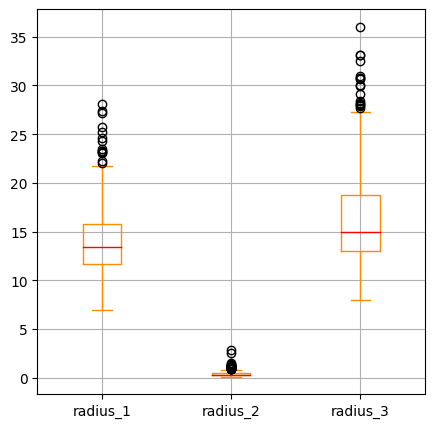

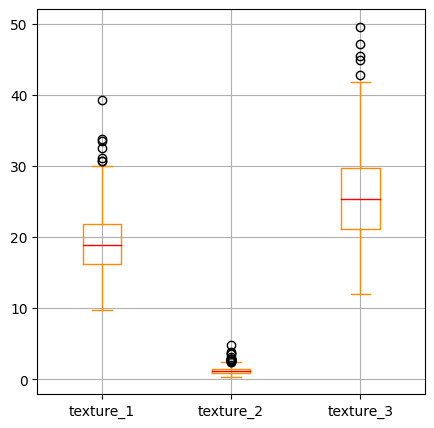

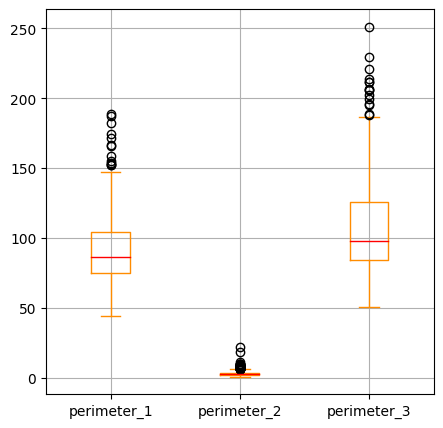

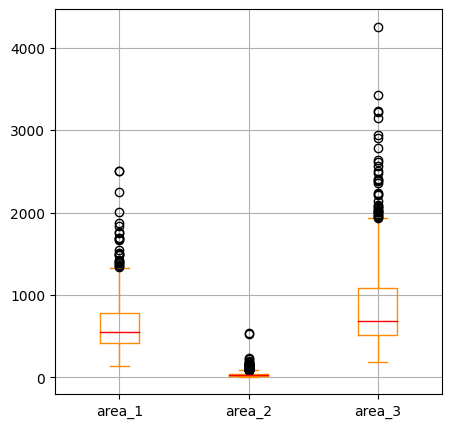

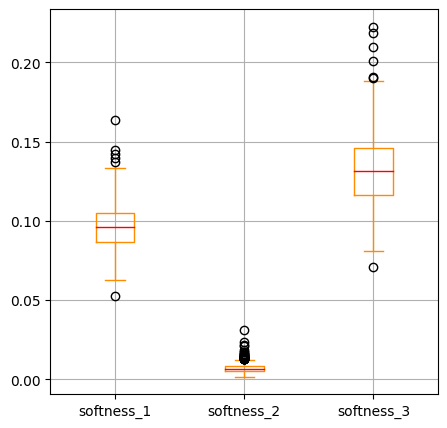

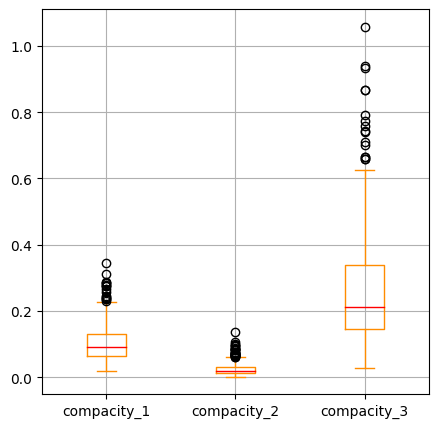

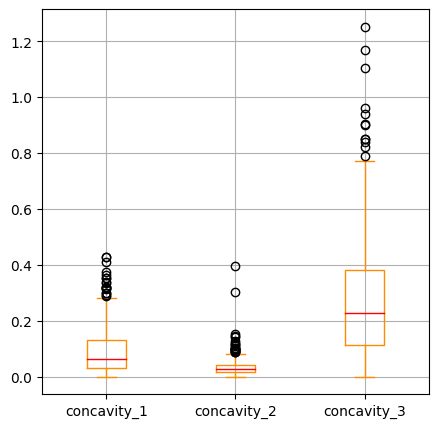

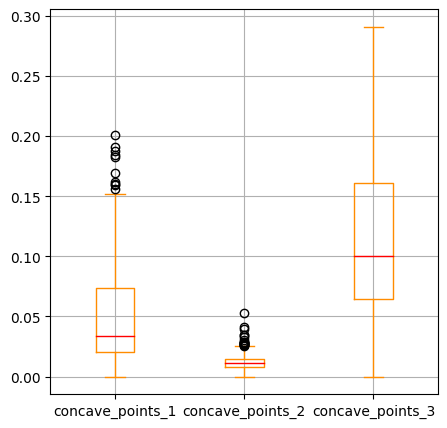

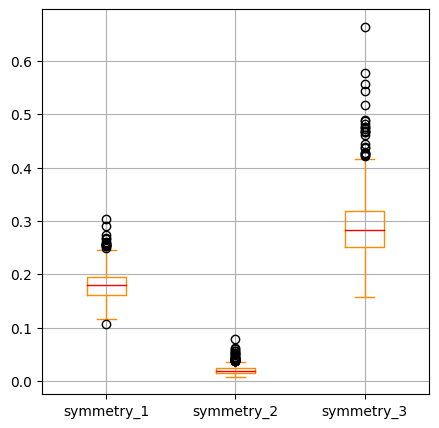

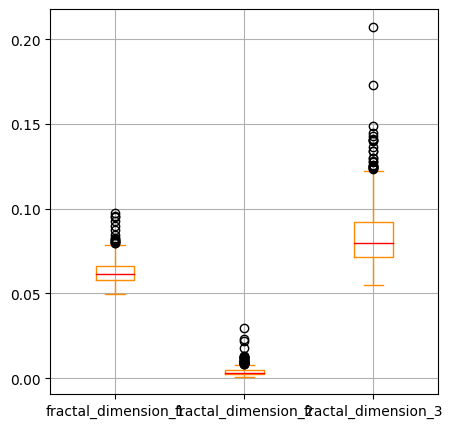

In [47]:
# Boxplot view for each group of column.
palette = "#ff8c00"

# Split the whole dataset columns into groups.
mask_radius = ['radius_1', 'radius_2','radius_3']
mask_texture = ['texture_1', 'texture_2','texture_3']
mask_perimeter = ['perimeter_1', 'perimeter_2','perimeter_3']
mask_area = ['area_1', 'area_2','area_3']
mask_softness = ['softness_1', 'softness_2','softness_3']
mask_compacity = ['compacity_1', 'compacity_2','compacity_3']
mask_concavity = ['concavity_1', 'concavity_2','concavity_3']
mask_concave_points = ['concave_points_1', 'concave_points_2','concave_points_3']
mask_symmetry = ['symmetry_1', 'symmetry_2','symmetry_3']
mask_fractal_dimension = ['fractal_dimension_1', 'fractal_dimension_2','fractal_dimension_3']

df_radius = df[mask_radius]
df_texture = df[mask_texture]
df_perimeter = df[mask_perimeter]
df_area = df[mask_area]
df_softness = df[mask_softness]
df_compacity = df[mask_compacity]
df_concavity = df[mask_concavity]
df_concave_points = df[mask_concave_points]
df_symmetry = df[mask_symmetry]
df_fractal_dimension = df[mask_fractal_dimension]

# Boxplots for each group of feature.
boxplot1 = df_radius.boxplot(figsize=(5,5), color=dict(boxes=palette, whiskers=palette, medians='r', caps=palette))
plt.show()
boxplot2 = df_texture.boxplot(figsize=(5,5), color=dict(boxes=palette, whiskers=palette, medians='r', caps=palette))
plt.show()
boxplot3 = df_perimeter.boxplot(figsize=(5,5), color=dict(boxes=palette, whiskers=palette, medians='r', caps=palette))
plt.show()
boxplot4 = df_area.boxplot(figsize=(5,5), color=dict(boxes=palette, whiskers=palette, medians='r', caps=palette))
plt.show()
boxplot5 = df_softness.boxplot(figsize=(5,5), color=dict(boxes=palette, whiskers=palette, medians='r', caps=palette))
plt.show()
boxplot6 = df_compacity.boxplot(figsize=(5,5), color=dict(boxes=palette, whiskers=palette, medians='r', caps=palette))
plt.show()
boxplot7 = df_concavity.boxplot(figsize=(5,5), color=dict(boxes=palette, whiskers=palette, medians='r', caps=palette))
plt.show()
boxplot8 = df_concave_points.boxplot(figsize=(5,5), color=dict(boxes=palette, whiskers=palette, medians='r', caps=palette))
plt.show()
boxplot9 = df_symmetry.boxplot(figsize=(5,5), color=dict(boxes=palette, whiskers=palette, medians='r', caps=palette))
plt.show()
boxplot10 = df_fractal_dimension.boxplot(figsize=(5,5), color=dict(boxes=palette, whiskers=palette, medians='r', caps=palette))
plt.show()

In [48]:
# Removing outliers.
z_scores = np.abs(stats.zscore(df,nan_policy='omit'))
filtered_entries = (z_scores < 3).all(axis=1)
df = df[filtered_entries]

# Dataset with no outliers.
size_with_no_outliers = len(df)
print(f'Dataset has only {size_with_no_outliers} elements.')

Dataset has only 487 elements.


## Representação Gráfica dos Dados

Afim de visualizar melhor as distribuições dos dados, representamos graficamente cada uma das colunas do conjunto de dados. Os dados numéricos foram representados por gráfico de barras.

O atributo `id` foi removido dessa análise porqueé um atributo único de cada amostra, assim como não apresenta uma informação relevante para a análise.

Além disso, também foi removida a coluna `diagnostic`, a qual apresenta o diagnóstico de cada amostra.

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


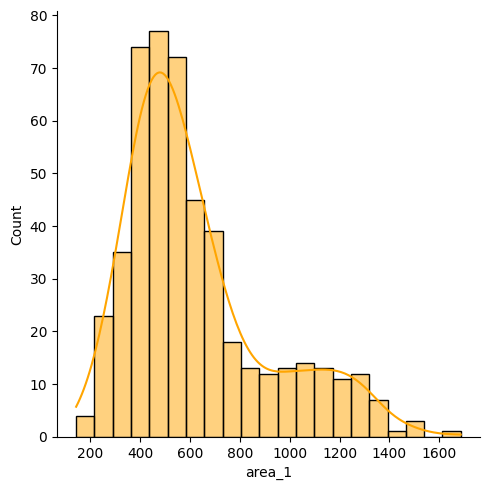

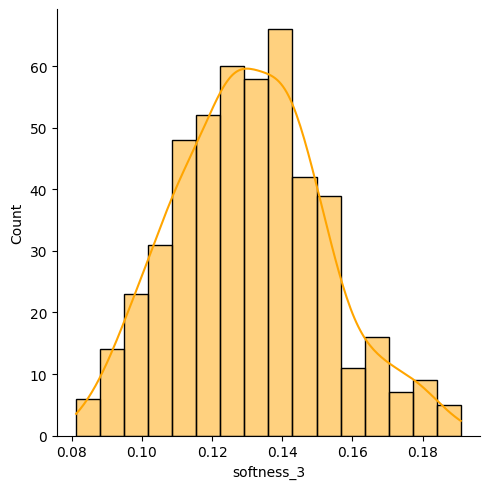

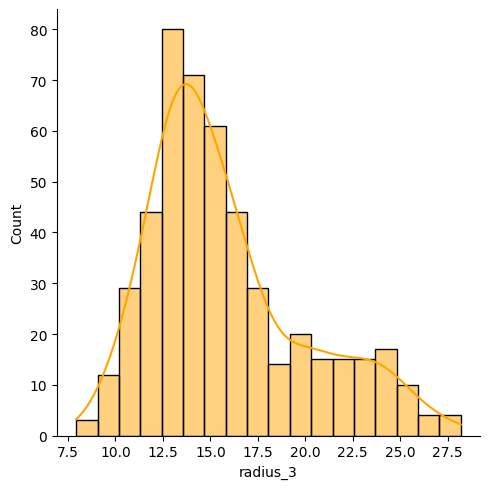

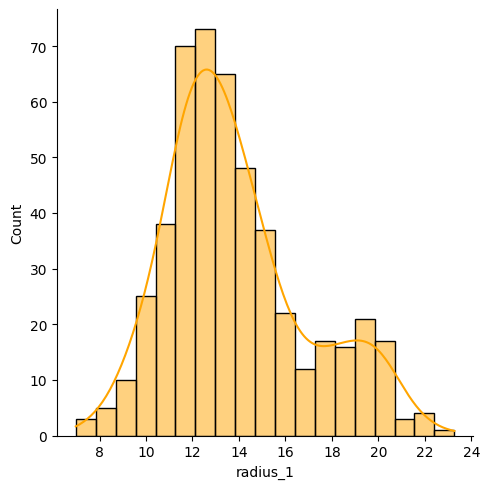

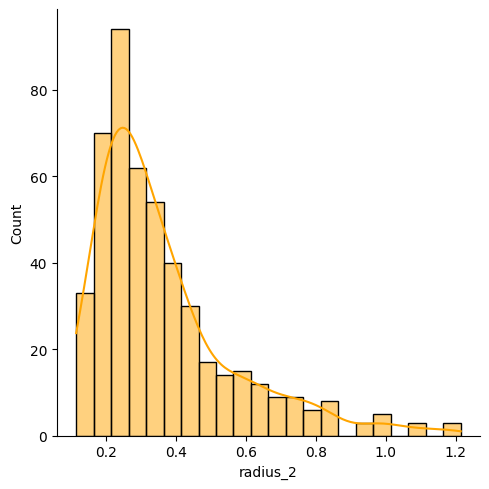

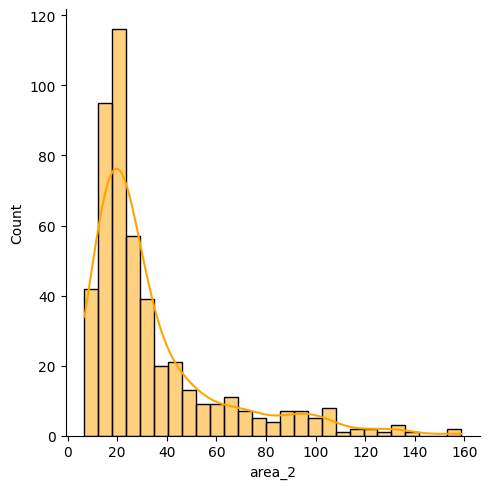

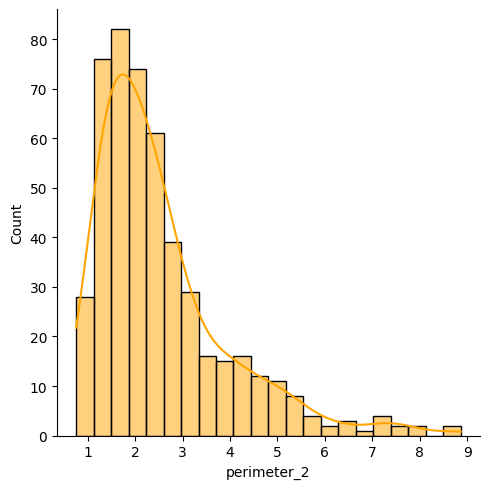

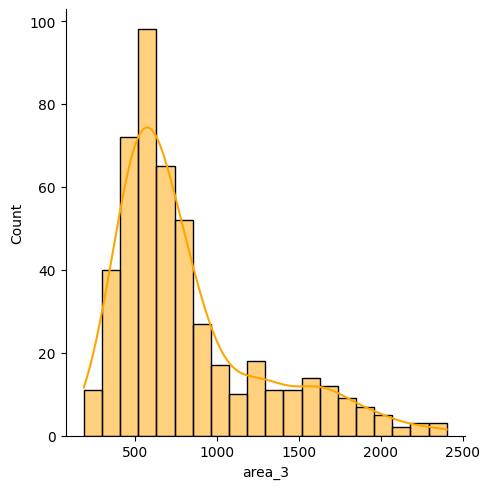

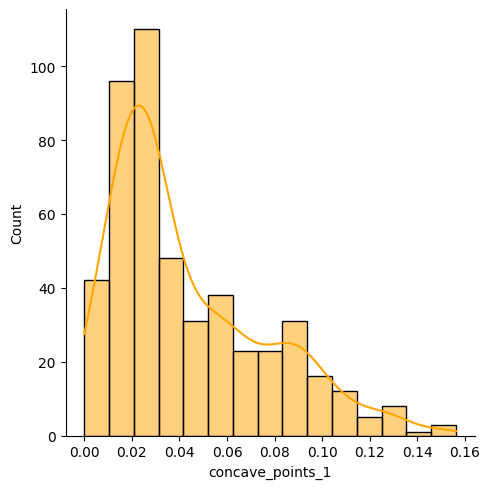

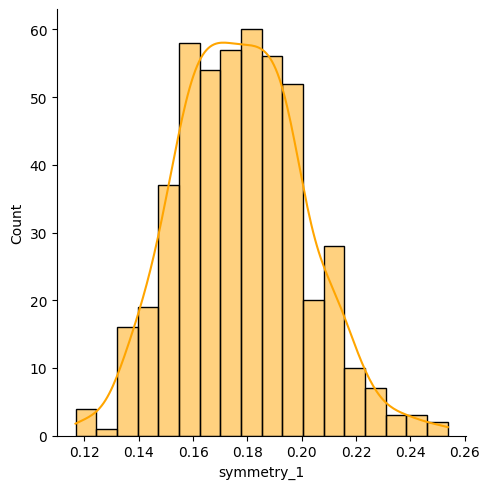

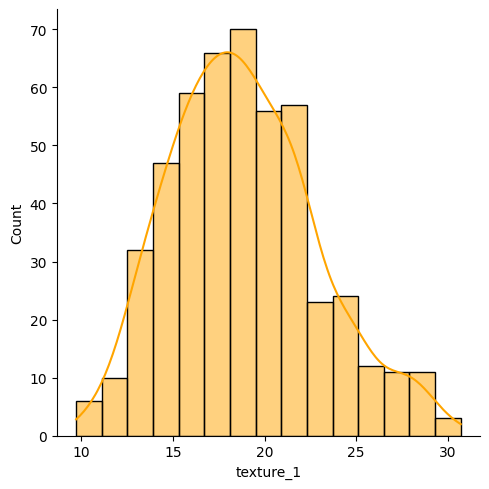

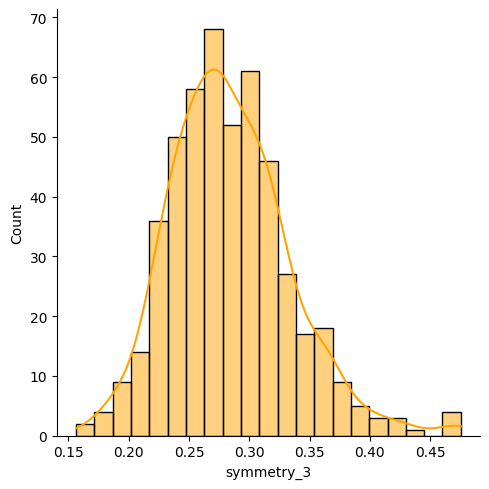

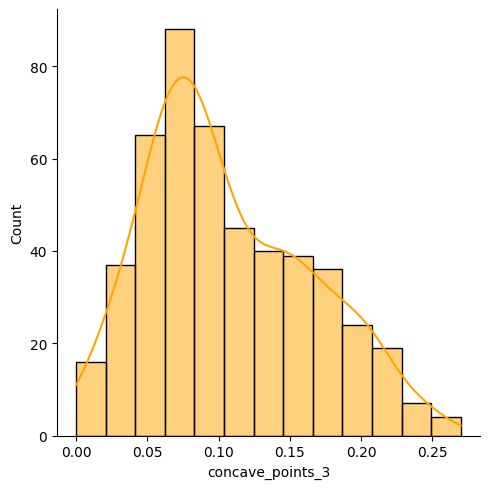

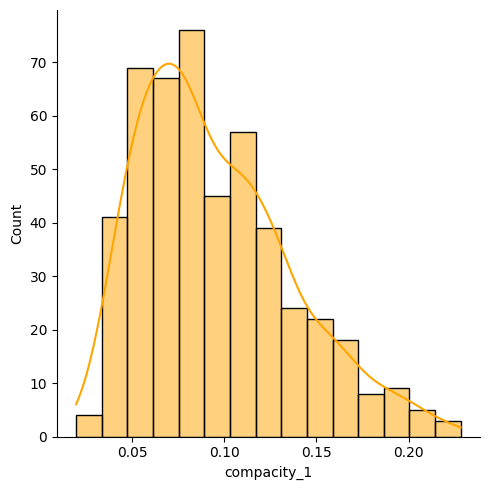

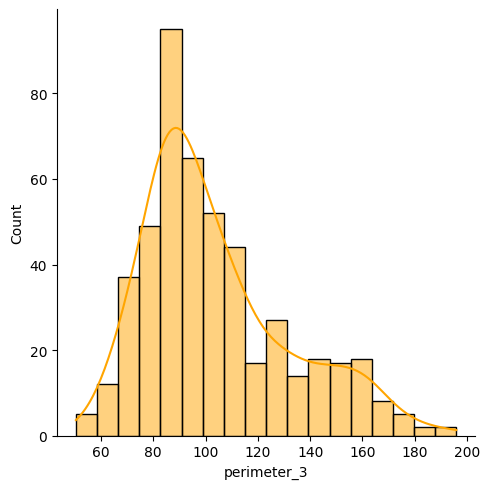

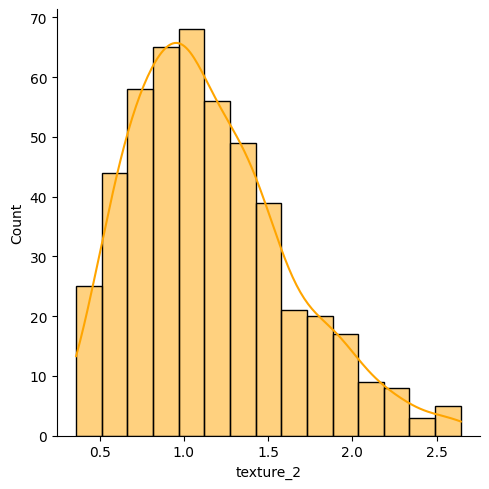

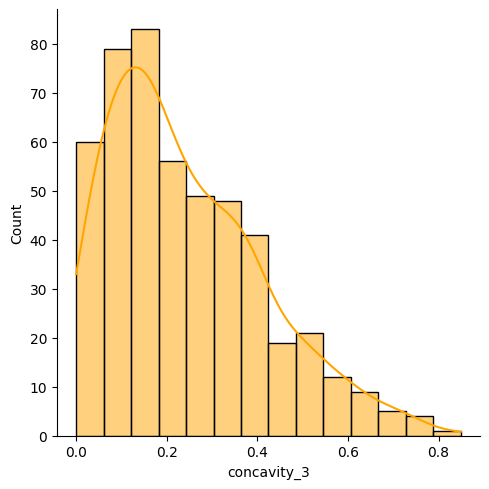

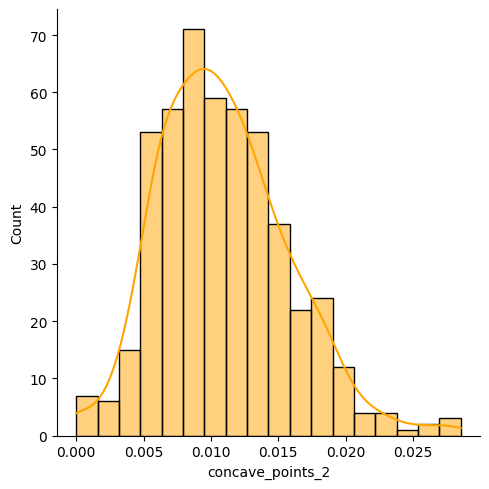

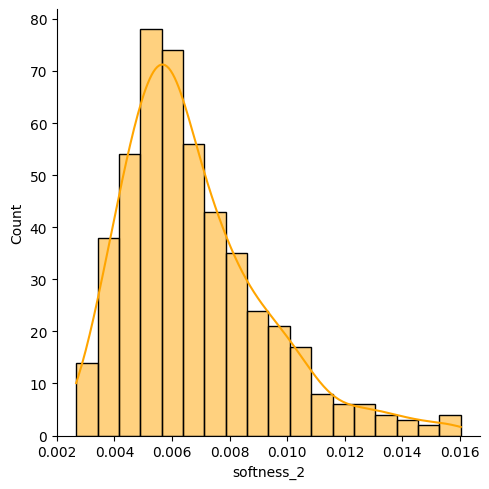

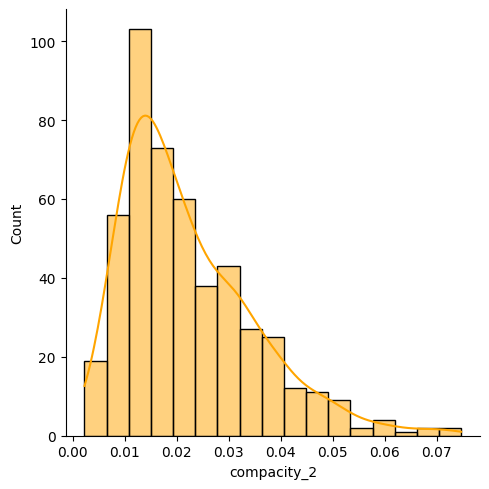

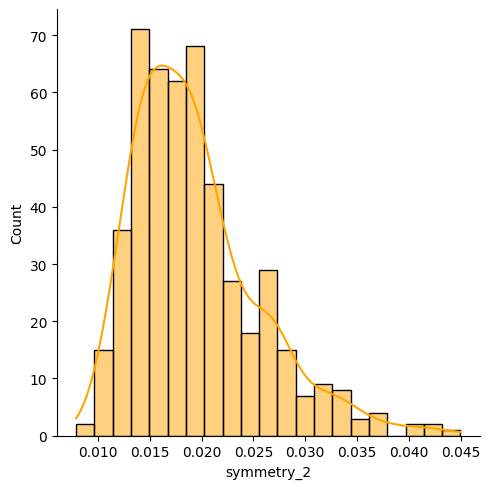

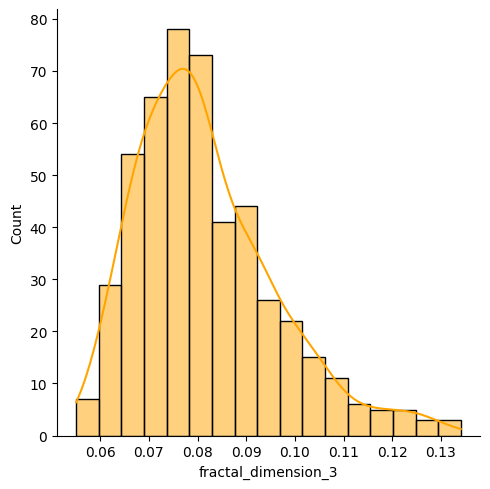

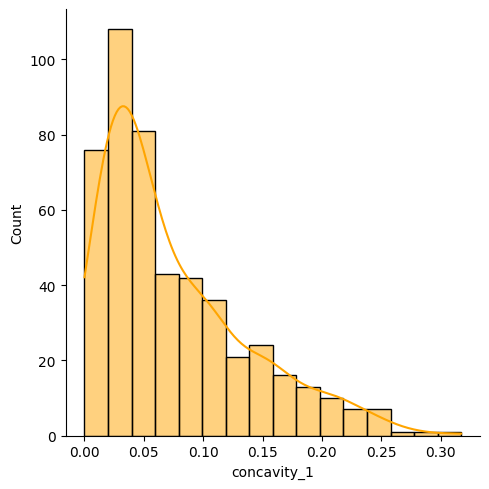

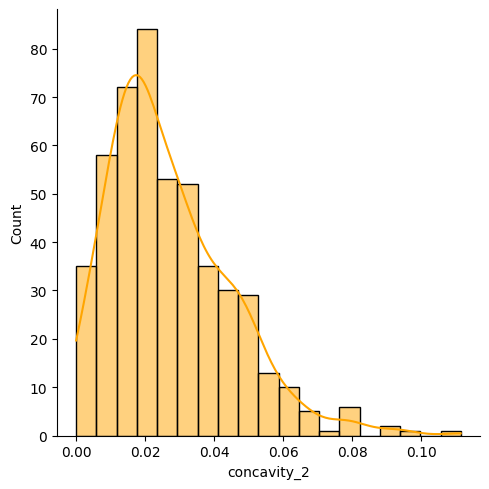

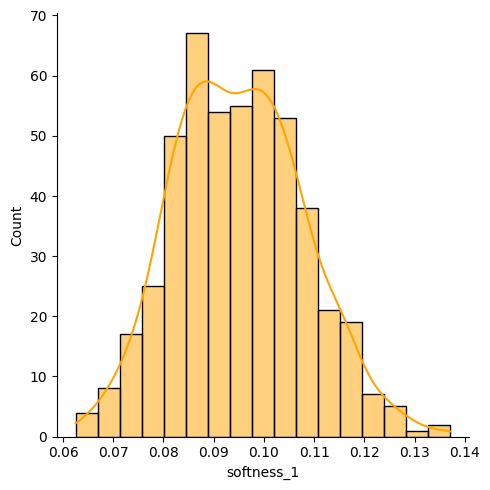

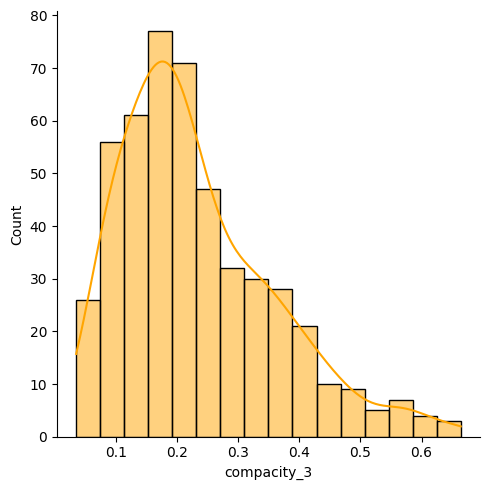

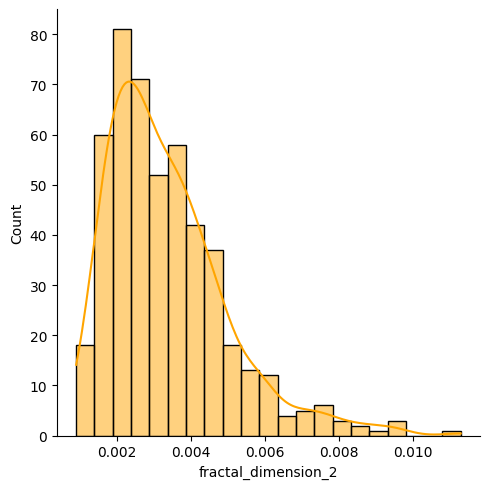

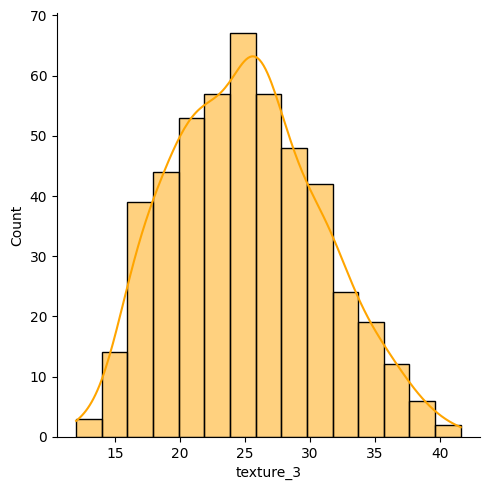

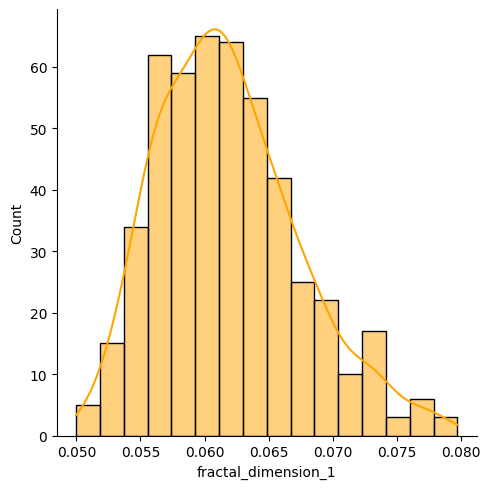

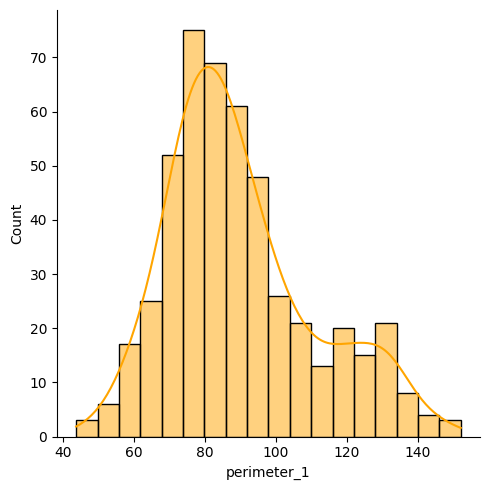

In [49]:
# Graphical representation for numerical data.
num_data = list(column_names.keys() - ['id', 'diagnostic'])
for column in num_data:
  sns.displot(df[column], kde=True, color="orange")

# Análise Estatística

Para entender melhor as características dos pacientes com diagnóstico positivo para câncer de mama, fizemos algumas análises sobre os dados.

Para isso, aplicamos um filtro no *dataset* para retorna apenas esses pacientes. Dessa forma, contendo os pacientes com diagnóstico positivo, visualizamos a maneira que eles estão dispostos de acordo com cada atributo de cada núcleo celular, além de identificar a média dessas categorias.

In [50]:
# Filtering all patients with positive diagnostic.
filter = (df['diagnostic']==1)
positive = df.loc[filter]

def analysis_by_feature(feature_name):
  mean = positive[feature_name].mean()
  print(f'A média de {feature_name} das pessoas com diagnóstico positivo de câncer de mama é', f'{mean:.2f}')

  sns.displot(positive[feature_name], kde=True, color="orange")
  plt.axvline(mean, color='red', linestyle='--', label='Média')
  plt.xlabel(feature_name.capitalize())
  plt.ylabel("Quantidade")
  plt.title(f'Diagnósticos Positivos por {feature_name}')
  plt.legend()
  plt.show()

A média de area_1 das pessoas com diagnóstico positivo de câncer de mama é 922.49


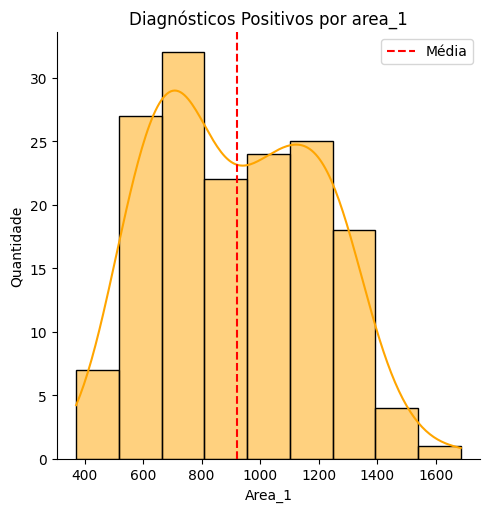

A média de softness_3 das pessoas com diagnóstico positivo de câncer de mama é 0.14


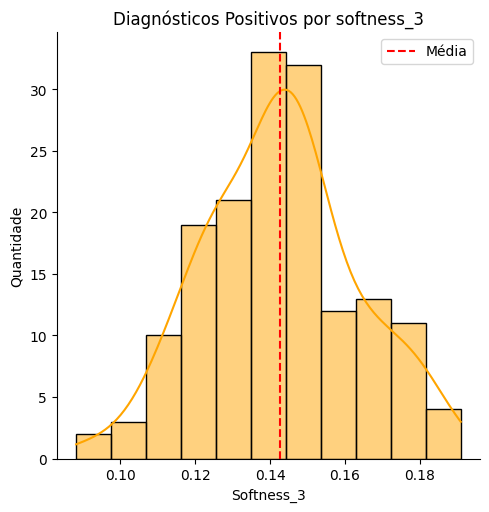

A média de radius_3 das pessoas com diagnóstico positivo de câncer de mama é 20.47


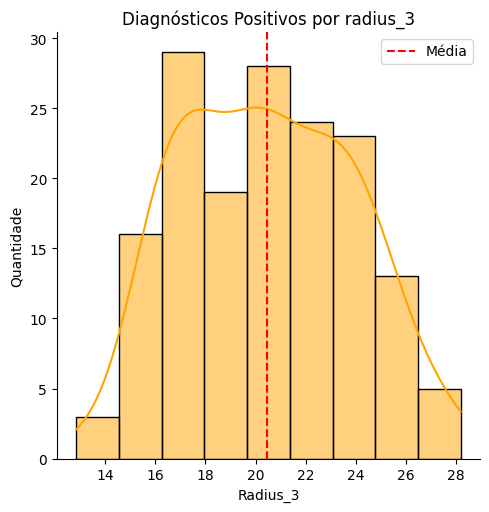

A média de radius_1 das pessoas com diagnóstico positivo de câncer de mama é 17.04


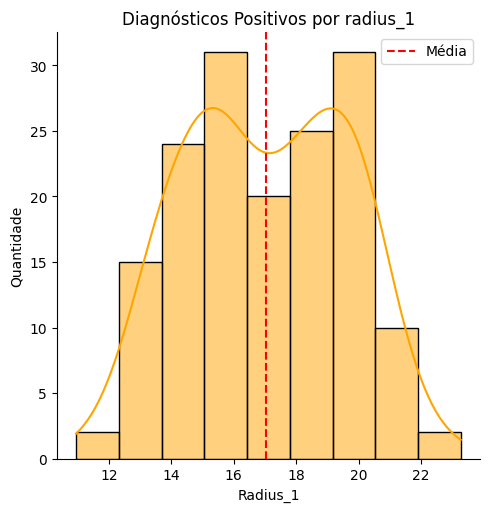

A média de radius_2 das pessoas com diagnóstico positivo de câncer de mama é 0.54


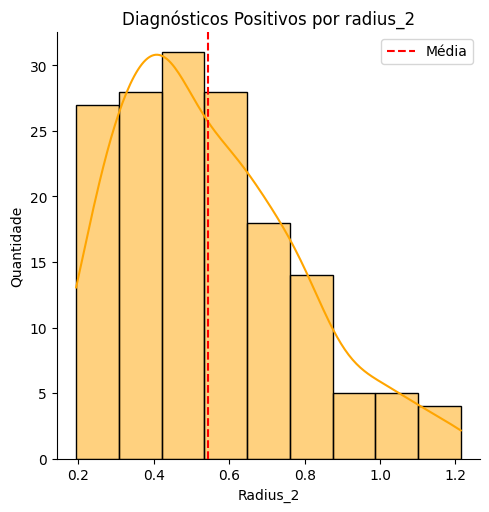

A média de area_2 das pessoas com diagnóstico positivo de câncer de mama é 60.80


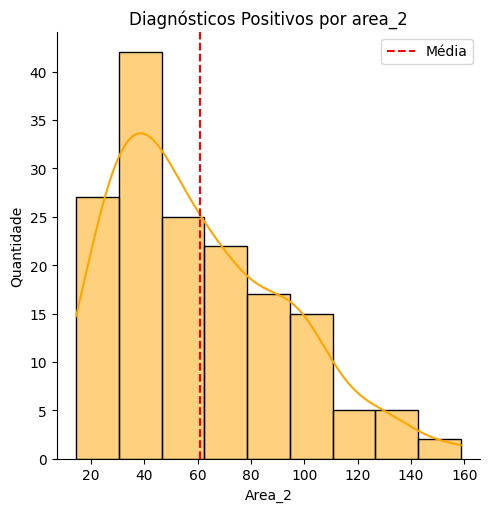

A média de perimeter_2 das pessoas com diagnóstico positivo de câncer de mama é 3.77


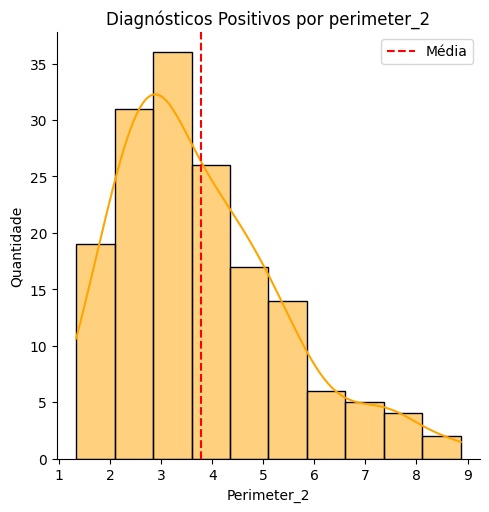

A média de area_3 das pessoas com diagnóstico positivo de câncer de mama é 1319.43


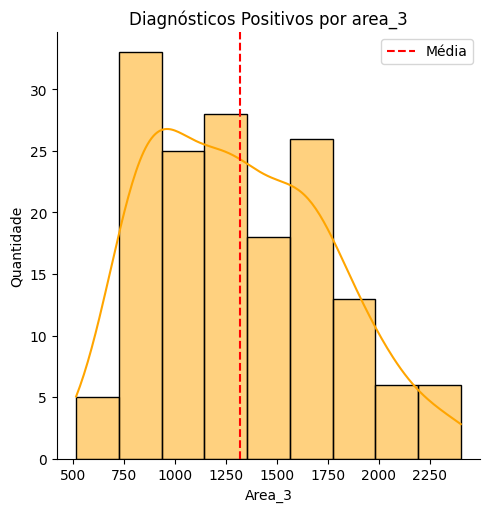

A média de concave_points_1 das pessoas com diagnóstico positivo de câncer de mama é 0.08


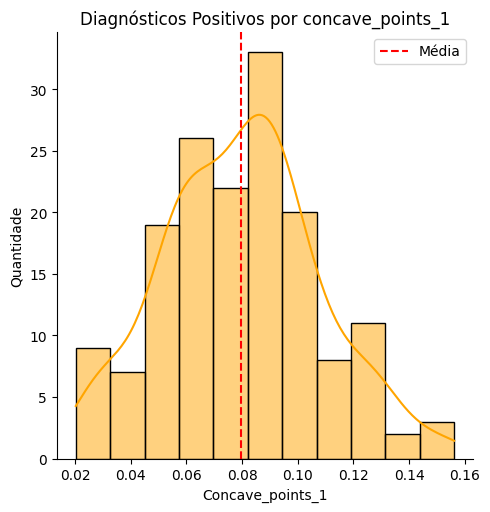

A média de symmetry_1 das pessoas com diagnóstico positivo de câncer de mama é 0.19


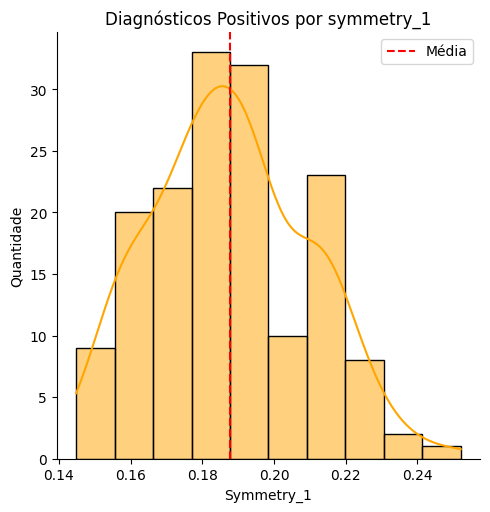

A média de texture_1 das pessoas com diagnóstico positivo de câncer de mama é 21.15


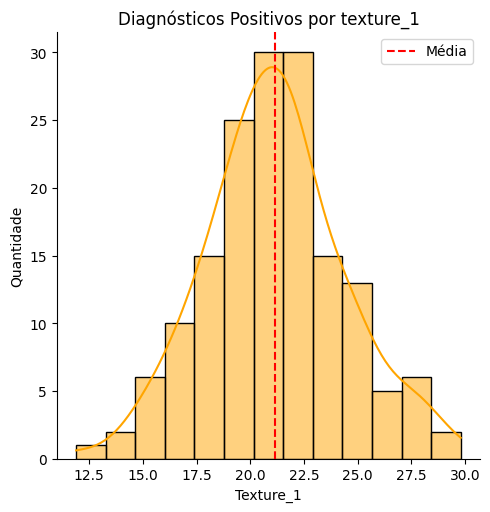

A média de symmetry_3 das pessoas com diagnóstico positivo de câncer de mama é 0.31


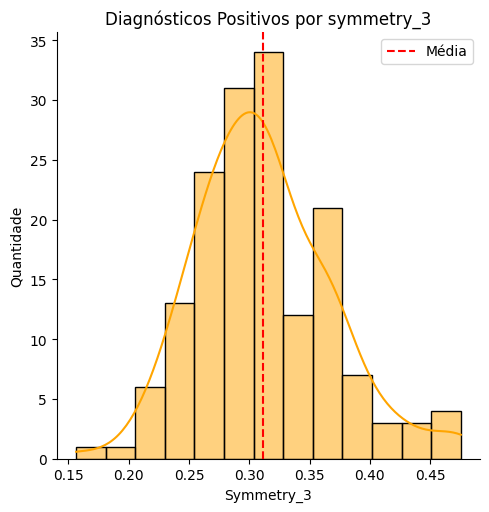

A média de concave_points_3 das pessoas com diagnóstico positivo de câncer de mama é 0.17


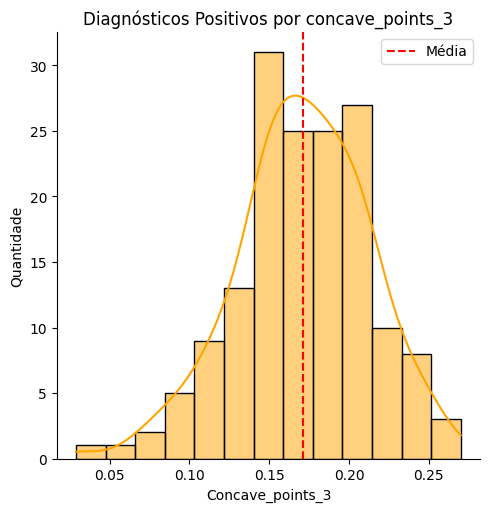

A média de compacity_1 das pessoas com diagnóstico positivo de câncer de mama é 0.13


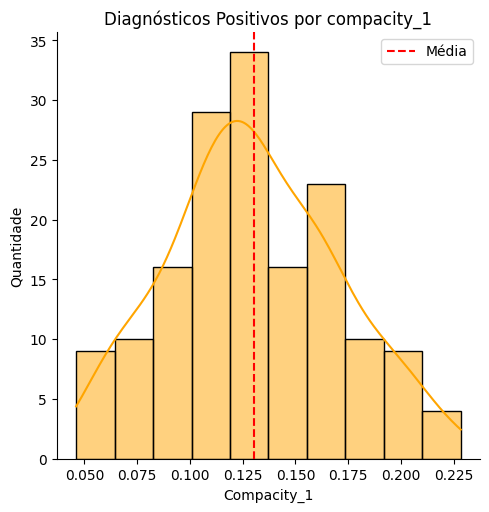

A média de perimeter_3 das pessoas com diagnóstico positivo de câncer de mama é 135.88


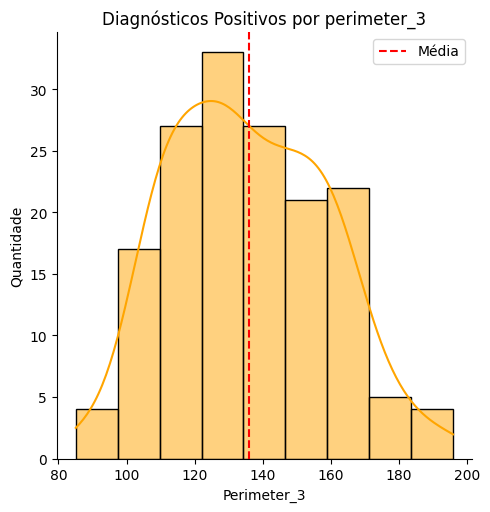

A média de texture_2 das pessoas com diagnóstico positivo de câncer de mama é 1.15


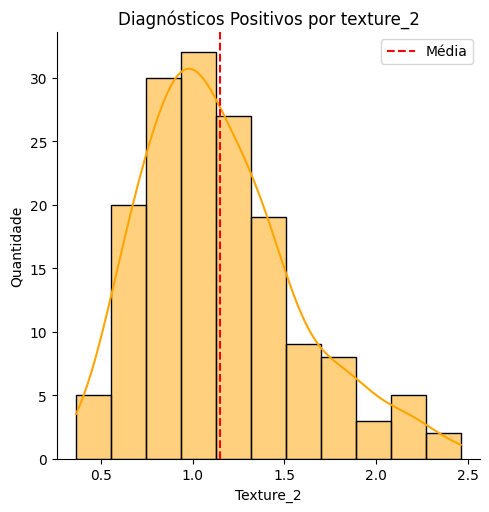

A média de concavity_3 das pessoas com diagnóstico positivo de câncer de mama é 0.41


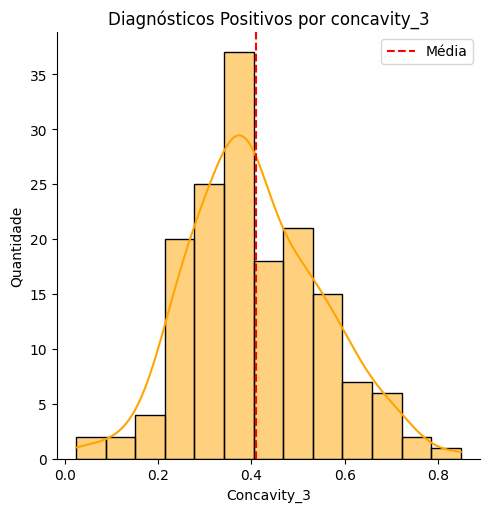

A média de concave_points_2 das pessoas com diagnóstico positivo de câncer de mama é 0.01


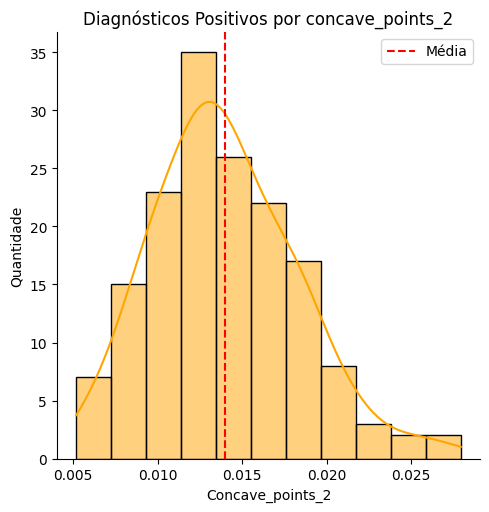

A média de softness_2 das pessoas com diagnóstico positivo de câncer de mama é 0.01


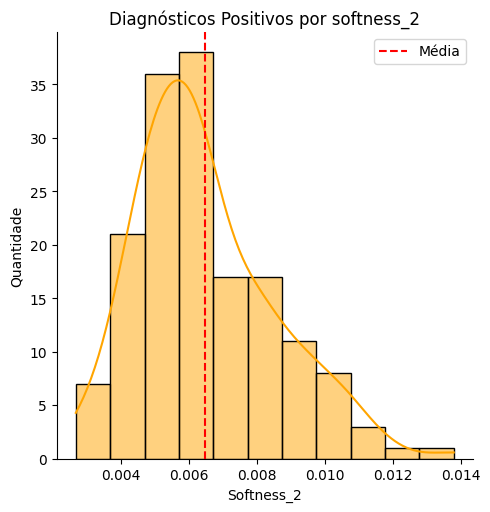

A média de compacity_2 das pessoas com diagnóstico positivo de câncer de mama é 0.03


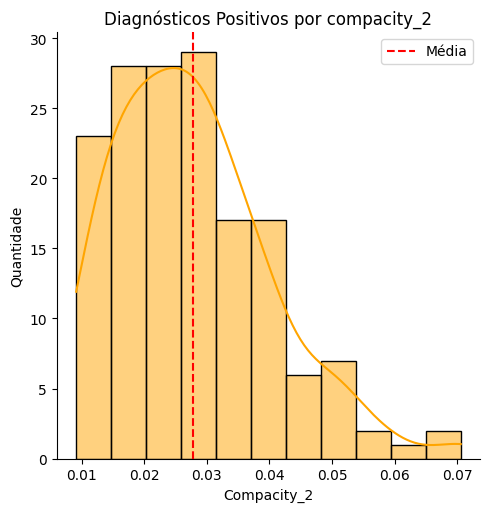

A média de symmetry_2 das pessoas com diagnóstico positivo de câncer de mama é 0.02


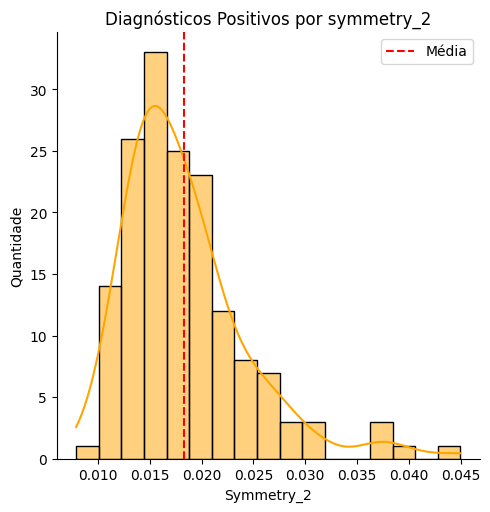

A média de fractal_dimension_3 das pessoas com diagnóstico positivo de câncer de mama é 0.09


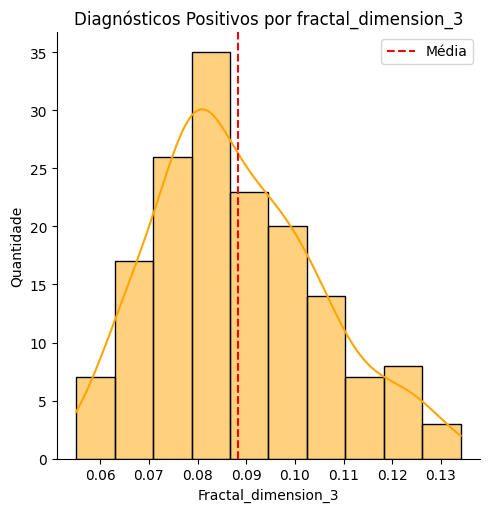

A média de concavity_1 das pessoas com diagnóstico positivo de câncer de mama é 0.14


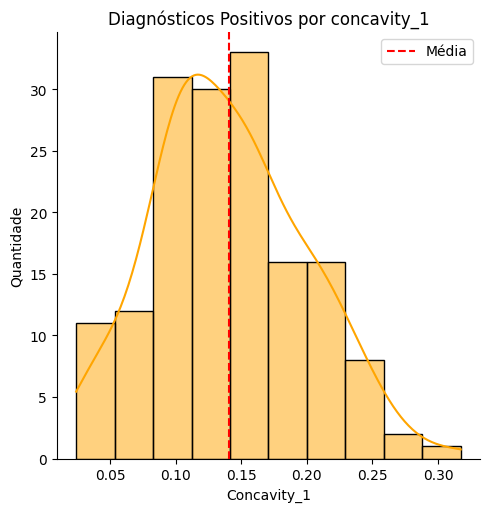

A média de concavity_2 das pessoas com diagnóstico positivo de câncer de mama é 0.04


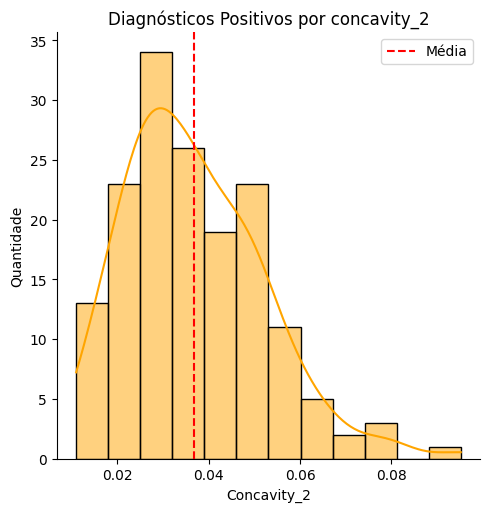

A média de softness_1 das pessoas com diagnóstico positivo de câncer de mama é 0.10


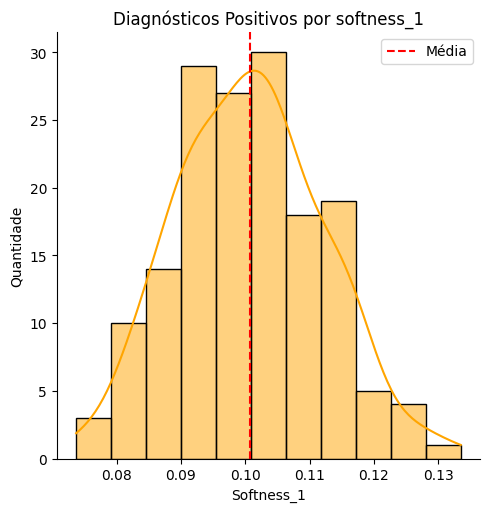

A média de compacity_3 das pessoas com diagnóstico positivo de câncer de mama é 0.34


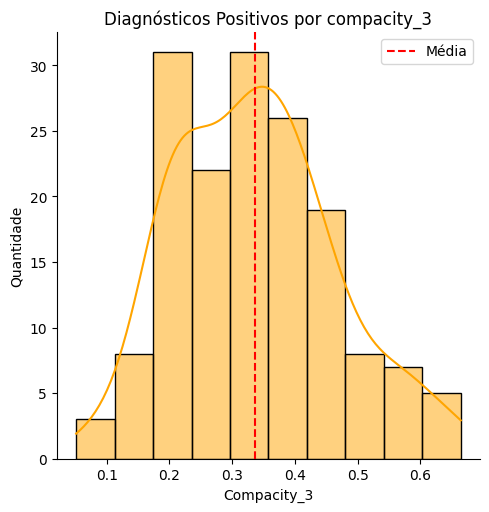

A média de fractal_dimension_2 das pessoas com diagnóstico positivo de câncer de mama é 0.00


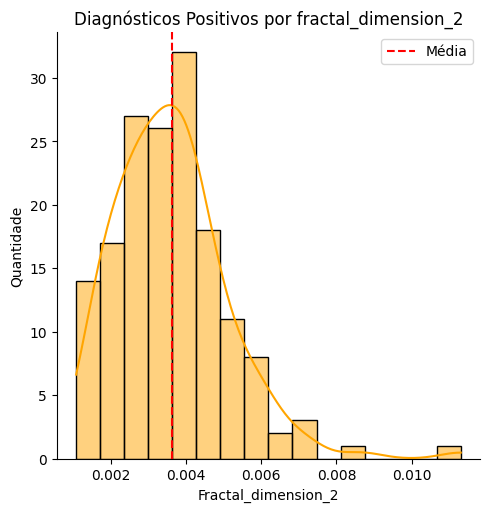

A média de texture_3 das pessoas com diagnóstico positivo de câncer de mama é 28.68


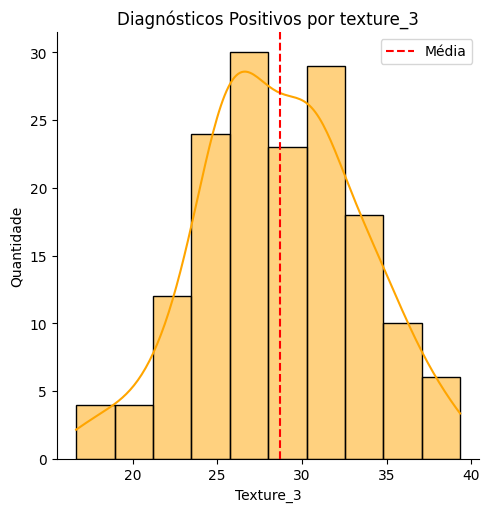

A média de fractal_dimension_1 das pessoas com diagnóstico positivo de câncer de mama é 0.06


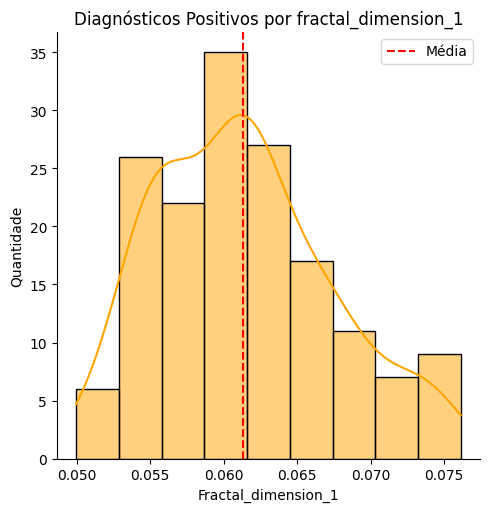

A média de perimeter_1 das pessoas com diagnóstico positivo de câncer de mama é 112.00


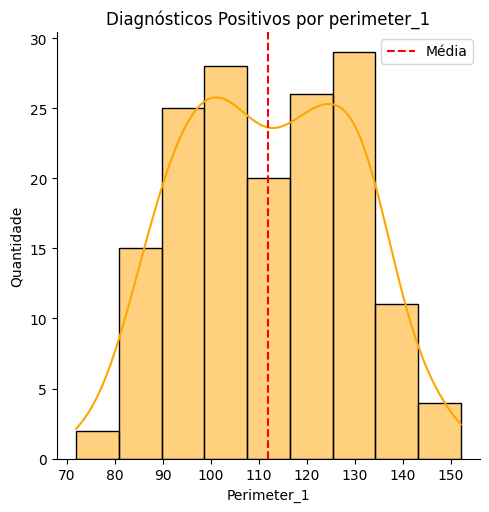

In [51]:
for feature in num_data:
  analysis_by_feature(feature)

# Bibliotecas para o Treinamento e Análise do Modelo

* A biblioteca `sklearn` será utilizada para todo o processo de separação de *dataset*, pré-processamento, treinamento e análise dos resultados do modelo;
* A biblioteca `Boruta` será utilizada para selecionar as features do conjunto de dados que fazem com que o modelo performe melhor.

In [52]:
pip install Boruta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from subprocess import call
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

## Esquema de Treinamento de Análise de Resultados

Para o treinamento dos dados e análise dos resultados do modelo, criaremos duas funções auxiliares que facilitarão o trabalho no decorrer dos experimentos a serem a testados futuramente.

## Análise de Resultados

A função `get_results` é responsável por apresentar os resultados da aprendizagem do modelo. Para sermos capazes de apresentar o desempenho do modelo precisamos dos dados de testes que separamos no momento do treinamento. Assim, a partir do conjunto de características e de seus respectivos *ground truth*, somos capazes de saber se o modelo acertou ou errou uma predição do conjunto de testes.

Após a testagem do modelo com esse conjunto, apresentamos os gráficos de matriz de confusão e valores importantes para a análise de desempenho do classificador. Esses valores são justamente as métricas de performance. Dentre as métricas apresentadas por esta função, existem as métricas utilizadas como pontos de análise proposto por este documento: as métricas de acurácia, precisão, recall e f1-score.

In [54]:
def get_results(x_test, y_test, model):
  predicted = model.predict(x_test)
  print("Acurácia = %0.4f" %(accuracy_score(y_test, predicted)))
  cm = confusion_matrix(y_test, predicted)
  sns.heatmap(cm, center=True, cmap="Blues")
  plt.show()
  print(pd.DataFrame(
    confusion_matrix(y_test, predicted),
    columns=['Previsão Diagnóstico Negativo', 'Previsão Diagnóstico Positivo'],
    index=['Verdadeiro Negativo', 'Verdadeiro Positivo']
  ))
  report = classification_report(y_test, predicted)
  print("\n\n\n")
  print(report)

## Treinamento

A função `train(df, stratified = False)` é responsável pelo treinamento do modelo a partir do conjunto de dados do parâmetro `df`. O parâmetro `stratified`, cujo valor padrão é falso, indica se os dados do *dataset* serão estratificados ou não. O parâmetro `stratify` do treinamento faz com que a amostra fique estratificada com base na coluna de sua escolha, no nosso caso escolhemos a coluna `y` a qual representa a predição do modelo. A importância da estratificação dos dados será apresentada de maneira mais detalhada na seção de Experimentos e Testes.

Durante o treinamento do modelo foi utilizada a validação cruzada. A validação cruzada é uma técnica importante para avaliar o desempenho do modelo em dados não vistos, sem comprometer um conjunto de dados que deve ser mantido para testes finais. Essa técnica envolve a divisão dos dados em conjuntos de treinamento e validação, onde o modelo é ajustado com o conjunto de treinamento e avaliado com o conjunto de validação. Esse processo é repetido várias vezes, cada vez com um conjunto de treinamento e validação diferentes, e o desempenho do modelo é calculado a partir da média dos resultados obtidos em cada iteração. A validação cruzada é útil para evitar o *overfitting*. No nosso caso, utilizamos uma quantidade de divisões do dataset em treino e validação de 5 iterações.

In [55]:
def train(df, stratified = False):
  # New table with all features but the diagnostic.
  x = df.drop('diagnostic', axis=1).copy() 

  # Table with just the diagnostic.
  y = df['diagnostic'].copy()

  if stratified==False:
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3) # separando em teste e treino
  else:
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3, stratify=y)

  # Train the Gaussian Naive Bayes.
  gnb = GaussianNB()
  gnb.fit(x_train, y_train)

  # Cross Validation.
  scores = cross_val_score(gnb, x_train, y_train, cv=5)
  print("\nValidação Cruzada:","\nAcurácia Média = %0.4f\nDesvio Padrão = %0.4f"%(scores.mean(),scores.std()))

  # Show results.
  get_results(x_test, y_test, gnb)

# Experimentos e Testes

A seção de experimentos e testes apresentam diversos cenários de treino e teste do nosso modelo. Utilizamos as seguintes abordagens experimentais:

* Dataset contento os dados brutos;
* Remoção do atributo `id` que não carrega uma informação relevante para o modelo;
* Remoção do atributo `compacity` o qual é obtido pelos atributos `area` e `perimeter`, o que vai no caminho inverso do Naive Bayes, o qual se baseia no fato de que os parâmetros são independentes;
* Seleção de *features* através do algoritmo Random Forest;

Além disso, para cada uma das abordagens, foi testado também um cenário adicional com a estratificação dos dados. A amostragem estratificada serve para manter a proporção das classes dos dados na amostra. Isso faz com que a amostra se comporte de maneira mais semelhante aos dados.

É recomendado utilizar o `stratify` principalmente quando os dados estão muito desbalanceados. 

Isso, pois, por exemplo, suponhamos um conjunto de dados com 10% de uma classe A e 90% de outra classe B. Sem a estratificação pode ocorrer que, ao fazer o `train_test_split`, os dados de treino fique com poucos dados da classe A e eles fiquem quase totalmente nos dados de teste.

A estratificação faz com que tanto os dados de treino quanto de teste tenham aproximadamente 10% de dados da classe A e 90% da classe B, neste cenário.

Ademais, o experimento final do projeto foi utilizar o algoritmo Random Oversampling para balancear o conjunto de dados, visto que a quantidade de dados com diagnóstico positivo era praticamente metade dos dados com diagnóstico negativo para câncer de mama. Poderemos verificar tal informação na respecitva seção de testes utilizando essa estratégia.

## Dados Brutos

Nesse experimento, iremos treinar e checar a performance do algoritmo para toda a base de dados, sem modificação. Espera-se que o resultado desse experimento sirva apenas como *baseline* para os demais testes.


Validação Cruzada: 
Acurácia Média = 0.7353
Desvio Padrão = 0.0263
Acurácia = 0.7075


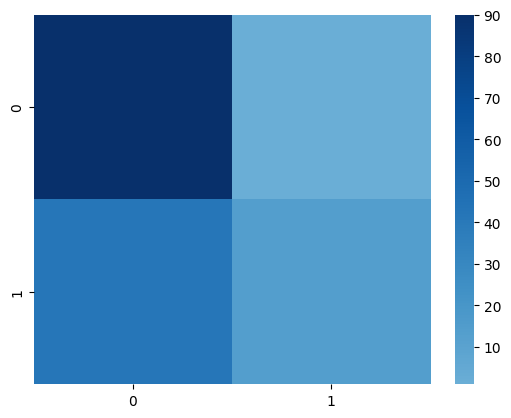

                     Previsão Diagnóstico Negativo  \
Verdadeiro Negativo                             90   
Verdadeiro Positivo                             42   

                     Previsão Diagnóstico Positivo  
Verdadeiro Negativo                              1  
Verdadeiro Positivo                             14  




              precision    recall  f1-score   support

         0.0       0.68      0.99      0.81        91
         1.0       0.93      0.25      0.39        56

    accuracy                           0.71       147
   macro avg       0.81      0.62      0.60       147
weighted avg       0.78      0.71      0.65       147



In [56]:
# Non-stratified data.
train(df)


Validação Cruzada: 
Acurácia Média = 0.7324
Desvio Padrão = 0.0569
Acurácia = 0.7755


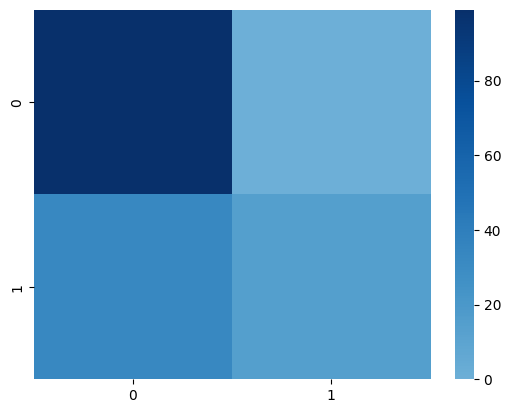

                     Previsão Diagnóstico Negativo  \
Verdadeiro Negativo                             99   
Verdadeiro Positivo                             33   

                     Previsão Diagnóstico Positivo  
Verdadeiro Negativo                              0  
Verdadeiro Positivo                             15  




              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86        99
         1.0       1.00      0.31      0.48        48

    accuracy                           0.78       147
   macro avg       0.88      0.66      0.67       147
weighted avg       0.83      0.78      0.73       147



In [57]:
# Stratified data.
train(df, True)

## Removendo Atributo `id`

O atributo `id` é único de cada amostra dos dados. Dessa forma, percebemos que este atributo não carrega uma informação interessante para a aprendizagem do modelo. Assim, o segundo experimento se trata da remoção desse atributo.




Validação Cruzada: 
Acurácia Média = 0.9441
Desvio Padrão = 0.0235
Acurácia = 0.9388


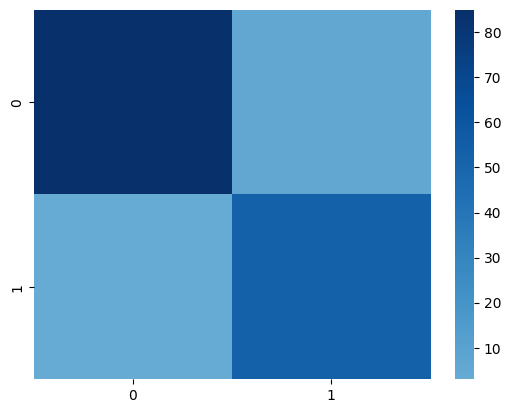

                     Previsão Diagnóstico Negativo  \
Verdadeiro Negativo                             85   
Verdadeiro Positivo                              3   

                     Previsão Diagnóstico Positivo  
Verdadeiro Negativo                              6  
Verdadeiro Positivo                             53  




              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95        91
         1.0       0.90      0.95      0.92        56

    accuracy                           0.94       147
   macro avg       0.93      0.94      0.94       147
weighted avg       0.94      0.94      0.94       147



In [58]:
# Non-stratified data.
df_without_id = df.drop(columns=['id']).copy()
train(df_without_id)


Validação Cruzada: 
Acurácia Média = 0.9412
Desvio Padrão = 0.0246
Acurácia = 0.9388


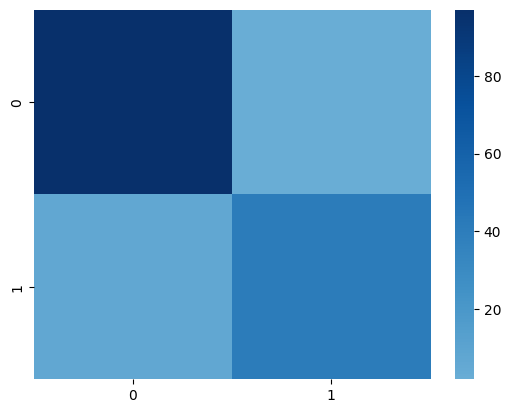

                     Previsão Diagnóstico Negativo  \
Verdadeiro Negativo                             97   
Verdadeiro Positivo                              7   

                     Previsão Diagnóstico Positivo  
Verdadeiro Negativo                              2  
Verdadeiro Positivo                             41  




              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96        99
         1.0       0.95      0.85      0.90        48

    accuracy                           0.94       147
   macro avg       0.94      0.92      0.93       147
weighted avg       0.94      0.94      0.94       147



In [59]:
# Stratified data.
train(df_without_id, True)

## Removendo Atributo `compacity`

O terceiro experimento é definido pela remoção do atributo `compacity` da base de dados, além da remoção do `id` realizada anteriormente.

O atributo `compacity` é definido como
\begin{equation*}
compacity = \frac{perimeter^2}{area - 1}
\end{equation*}
<br />

Dessa forma, vemos que a compacidade depende da área e do perímetro, o que não é interessante para o algoritmo Naive Bayes, visto que a suposição do Classificador Ingênuo de Bayes é que as característica sejam são independentes.


Validação Cruzada: 
Acurácia Média = 0.9559
Desvio Padrão = 0.0246
Acurácia = 0.9592


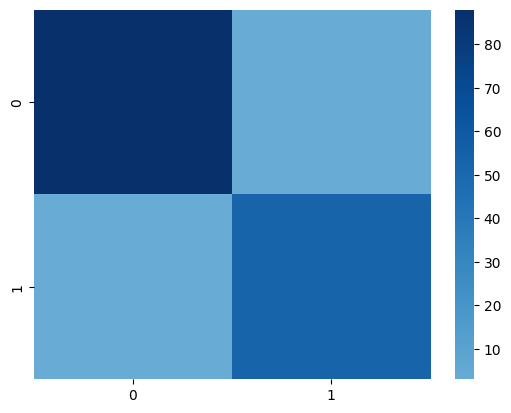

                     Previsão Diagnóstico Negativo  \
Verdadeiro Negativo                             88   
Verdadeiro Positivo                              3   

                     Previsão Diagnóstico Positivo  
Verdadeiro Negativo                              3  
Verdadeiro Positivo                             53  




              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97        91
         1.0       0.95      0.95      0.95        56

    accuracy                           0.96       147
   macro avg       0.96      0.96      0.96       147
weighted avg       0.96      0.96      0.96       147



In [60]:
# Non-stratified data.
df_without_id_and_compacity = df.drop(columns=['id', 'compacity_1', 'compacity_2', 'compacity_3'])
train(df_without_id_and_compacity)


Validação Cruzada: 
Acurácia Média = 0.9500
Desvio Padrão = 0.0239
Acurácia = 0.9456


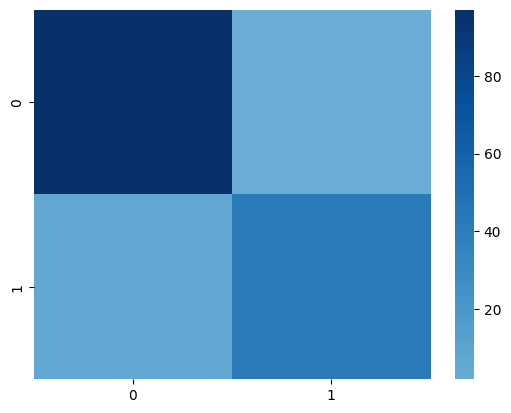

                     Previsão Diagnóstico Negativo  \
Verdadeiro Negativo                             97   
Verdadeiro Positivo                              6   

                     Previsão Diagnóstico Positivo  
Verdadeiro Negativo                              2  
Verdadeiro Positivo                             42  




              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96        99
         1.0       0.95      0.88      0.91        48

    accuracy                           0.95       147
   macro avg       0.95      0.93      0.94       147
weighted avg       0.95      0.95      0.94       147



In [61]:
# Stratified data.
train(df_without_id_and_compacity, True)

## Random Forest

O quarto cenário de testes se configura pelo uso de uma Random Forest para seleção de features do conjunto de dados que são mais relevantes para o treinamento do modelo.

A Random Forest constrói várias árvores de decisão com diferentes subconjuntos de features aleatórios, e as features que são mais importantes para a predição do modelo são selecionadas com base na sua frequência de aparecimento nas árvores. A seleção de features é importante para melhorar a precisão do modelo, reduzir o tempo de treinamento e evitar o overfitting.

In [62]:
# Creates the random forest.
def feature_selector(dataset):
  x, y = dataset.drop('diagnostic', axis=1), dataset['diagnostic']

  metamodel = RandomForestClassifier(max_depth = 3)
  feature_selector = BorutaPy(metamodel, n_estimators='auto', verbose=False, random_state=28)

  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
  x_train=x_train.to_numpy()
  y_train=y_train.ravel()
  feature_selector.fit(x_train, y_train)
  return x, y, feature_selector.support_

In [63]:
# Get filtered features.
def filtered_features(dataset):
  df_filtered_after_random_forest = dataset.copy()
  chosen_features = []
  x, y, feature_selector_support = feature_selector(dataset)
  for i, val in enumerate(feature_selector_support):
    if val:
      chosen_features.append(x.columns[i])
  df_filtered_after_random_forest = df_filtered_after_random_forest[chosen_features]
  df_filtered_after_random_forest['diagnostic'] = y
  return df_filtered_after_random_forest


Validação Cruzada: 
Acurácia Média = 0.9441
Desvio Padrão = 0.0235
Acurácia = 0.9456


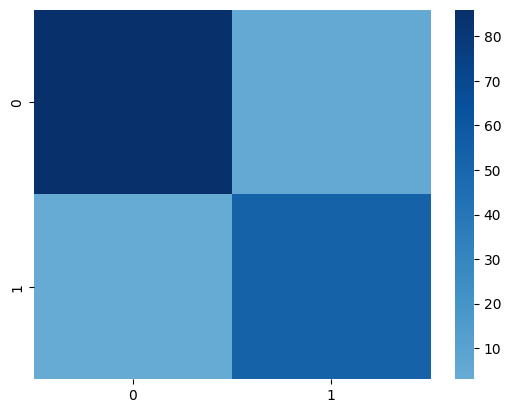

                     Previsão Diagnóstico Negativo  \
Verdadeiro Negativo                             86   
Verdadeiro Positivo                              3   

                     Previsão Diagnóstico Positivo  
Verdadeiro Negativo                              5  
Verdadeiro Positivo                             53  




              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96        91
         1.0       0.91      0.95      0.93        56

    accuracy                           0.95       147
   macro avg       0.94      0.95      0.94       147
weighted avg       0.95      0.95      0.95       147



In [64]:
# Non-stratified data.
df_filtered_after_random_forest = filtered_features(df)
train(df_filtered_after_random_forest)


Validação Cruzada: 
Acurácia Média = 0.9441
Desvio Padrão = 0.0285
Acurácia = 0.9388


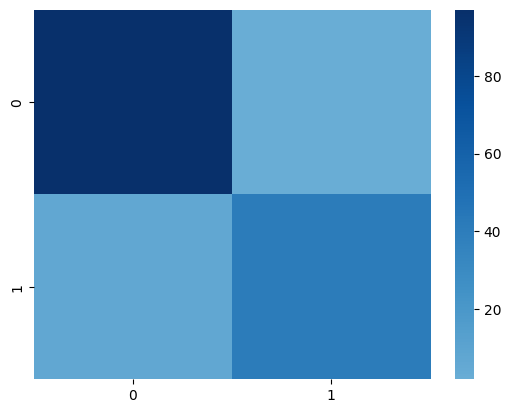

                     Previsão Diagnóstico Negativo  \
Verdadeiro Negativo                             97   
Verdadeiro Positivo                              7   

                     Previsão Diagnóstico Positivo  
Verdadeiro Negativo                              2  
Verdadeiro Positivo                             41  




              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96        99
         1.0       0.95      0.85      0.90        48

    accuracy                           0.94       147
   macro avg       0.94      0.92      0.93       147
weighted avg       0.94      0.94      0.94       147



In [65]:
# Stratified data.
train(df_filtered_after_random_forest, True)

## Balanceando *dataset*

O último cenário de teste envolve o balanceamento do *dataset*. Podemos perceber que a quantidade de dados com diagnóstico positiov para o câncer de mama é menos da metade dos diagnósticos negativos. Nesse caso, a nossa base de dados se mostra desbalanceada.

O processo de aumento dos dados da classe de menor abundância é feito por meio da duplicação aleatória das observações da classe minoritária, de forma que a quantidade de observações da classe minoritária seja aumentada para igualar a quantidade de observações da classe majoritária. Esse processo pode ser feito de forma repetida para alcançar o equilíbrio desejado. O método de Random Oversampling é uma técnica simples e fácil de implementar que pode melhorar a precisão do modelo em problemas de classificação com classes desbalanceadas. No entanto, o método também pode causar overfitting e introduzir ruído no conjunto de dados.

Para utilizarmos o algoritmo Random Oversampling, foi necessário instalar a biblioteca `imbalanced-learn` fornecida pela `scikit-learn`, utilizando a classe `RandomOverSampler` presente no módulo de `imblearn.over_sampling`. 

In [66]:
# Check balance.
df['diagnostic'].value_counts()

0.0    327
1.0    160
Name: diagnostic, dtype: int64

In [67]:
pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [68]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(df.drop(columns=['diagnostic']), df['diagnostic'])
y_res.value_counts()

1.0    327
0.0    327
Name: diagnostic, dtype: int64


Validação Cruzada: 
Acurácia Média = 0.8140
Desvio Padrão = 0.0591
Acurácia = 0.7868


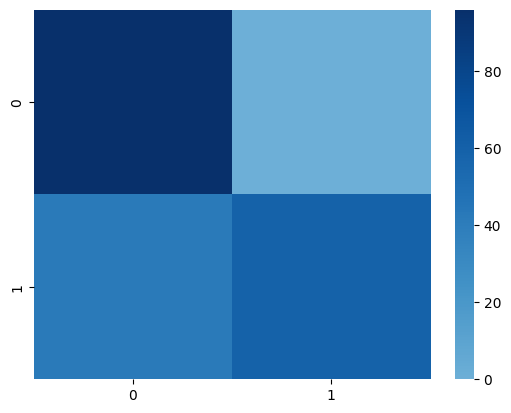

                     Previsão Diagnóstico Negativo  \
Verdadeiro Negativo                             96   
Verdadeiro Positivo                             42   

                     Previsão Diagnóstico Positivo  
Verdadeiro Negativo                              0  
Verdadeiro Positivo                             59  




              precision    recall  f1-score   support

         0.0       0.70      1.00      0.82        96
         1.0       1.00      0.58      0.74       101

    accuracy                           0.79       197
   macro avg       0.85      0.79      0.78       197
weighted avg       0.85      0.79      0.78       197



In [69]:
# Balanced raw and non-stratified data.
X_res['diagnostic'] = y_res
df_balance = X_res
train(df_balance)


Validação Cruzada: 
Acurácia Média = 0.8402
Desvio Padrão = 0.0301
Acurácia = 0.8223


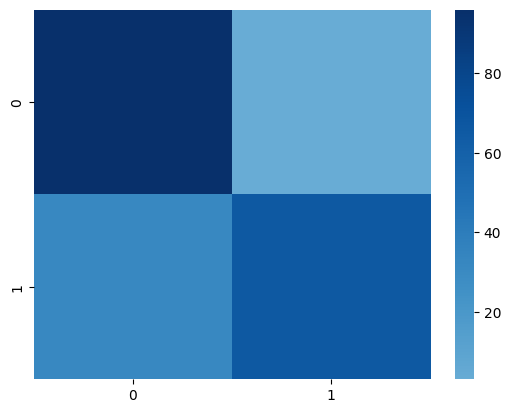

                     Previsão Diagnóstico Negativo  \
Verdadeiro Negativo                             96   
Verdadeiro Positivo                             32   

                     Previsão Diagnóstico Positivo  
Verdadeiro Negativo                              3  
Verdadeiro Positivo                             66  




              precision    recall  f1-score   support

         0.0       0.75      0.97      0.85        99
         1.0       0.96      0.67      0.79        98

    accuracy                           0.82       197
   macro avg       0.85      0.82      0.82       197
weighted avg       0.85      0.82      0.82       197



In [70]:
# Balanced raw and stratified data.
train(df_balance, True)


Validação Cruzada: 
Acurácia Média = 0.9255
Desvio Padrão = 0.0409
Acurácia = 0.9239


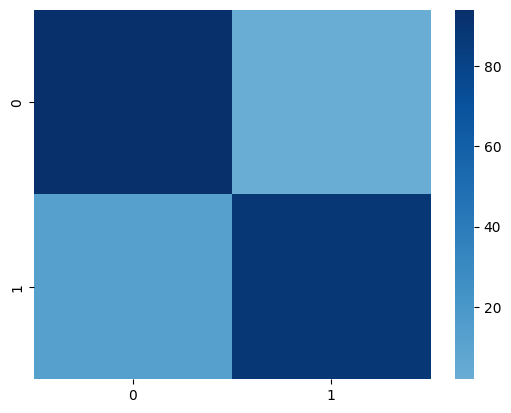

                     Previsão Diagnóstico Negativo  \
Verdadeiro Negativo                             94   
Verdadeiro Positivo                             13   

                     Previsão Diagnóstico Positivo  
Verdadeiro Negativo                              2  
Verdadeiro Positivo                             88  




              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93        96
         1.0       0.98      0.87      0.92       101

    accuracy                           0.92       197
   macro avg       0.93      0.93      0.92       197
weighted avg       0.93      0.92      0.92       197



In [71]:
# Balanced non-stratified data without `id` attribute.
df_balance_without_id = df_balance.drop(columns=['id']).copy()
train(df_balance_without_id)


Validação Cruzada: 
Acurácia Média = 0.9300
Desvio Padrão = 0.0113
Acurácia = 0.9391


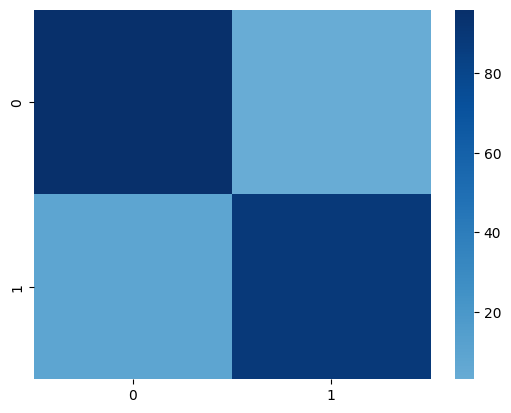

                     Previsão Diagnóstico Negativo  \
Verdadeiro Negativo                             96   
Verdadeiro Positivo                              9   

                     Previsão Diagnóstico Positivo  
Verdadeiro Negativo                              3  
Verdadeiro Positivo                             89  




              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94        99
         1.0       0.97      0.91      0.94        98

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197



In [72]:
# Balanced stratified data without `id` attribute.
train(df_balance_without_id, True)


Validação Cruzada: 
Acurácia Média = 0.9365
Desvio Padrão = 0.0299
Acurácia = 0.9391


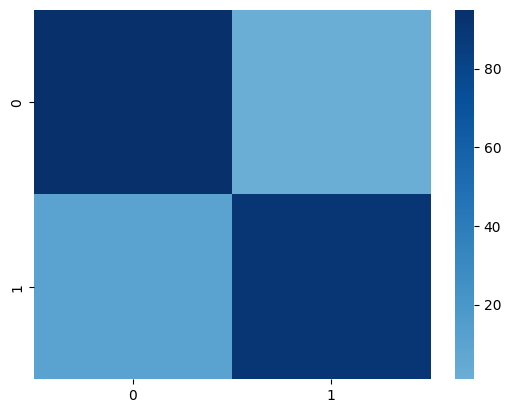

                     Previsão Diagnóstico Negativo  \
Verdadeiro Negativo                             95   
Verdadeiro Positivo                             11   

                     Previsão Diagnóstico Positivo  
Verdadeiro Negativo                              1  
Verdadeiro Positivo                             90  




              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94        96
         1.0       0.99      0.89      0.94       101

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197



In [73]:
# Balanced non-stratified data without `id` and `compacity` attributes.
df_balance_without_id_and_compacity = df_balance.drop(columns=['id', 'compacity_1', 'compacity_2', 'compacity_3'])
train(df_balance_without_id_and_compacity)


Validação Cruzada: 
Acurácia Média = 0.9431
Desvio Padrão = 0.0129
Acurácia = 0.9239


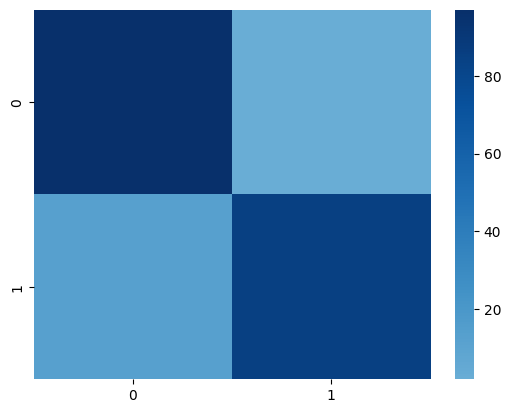

                     Previsão Diagnóstico Negativo  \
Verdadeiro Negativo                             97   
Verdadeiro Positivo                             13   

                     Previsão Diagnóstico Positivo  
Verdadeiro Negativo                              2  
Verdadeiro Positivo                             85  




              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93        99
         1.0       0.98      0.87      0.92        98

    accuracy                           0.92       197
   macro avg       0.93      0.92      0.92       197
weighted avg       0.93      0.92      0.92       197



In [74]:
# Balanced stratified data without `id` and `compacity` attributes.
df_balance_without_id_and_compacity = df_balance.drop(columns=['id', 'compacity_1', 'compacity_2', 'compacity_3'])
train(df_balance_without_id_and_compacity, True)


Validação Cruzada: 
Acurácia Média = 0.8140
Desvio Padrão = 0.0591
Acurácia = 0.7868


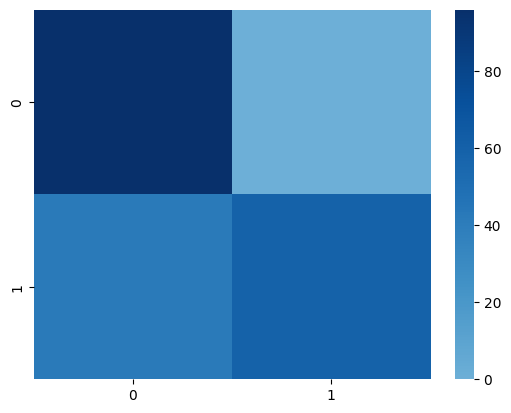

                     Previsão Diagnóstico Negativo  \
Verdadeiro Negativo                             96   
Verdadeiro Positivo                             42   

                     Previsão Diagnóstico Positivo  
Verdadeiro Negativo                              0  
Verdadeiro Positivo                             59  




              precision    recall  f1-score   support

         0.0       0.70      1.00      0.82        96
         1.0       1.00      0.58      0.74       101

    accuracy                           0.79       197
   macro avg       0.85      0.79      0.78       197
weighted avg       0.85      0.79      0.78       197



In [75]:
# Balanced non-stratified data with features selected by random forest.
df_balanced_filtered_after_random_forest = filtered_features(df_balance)
train(df_balanced_filtered_after_random_forest)


Validação Cruzada: 
Acurácia Média = 0.8402
Desvio Padrão = 0.0301
Acurácia = 0.8223


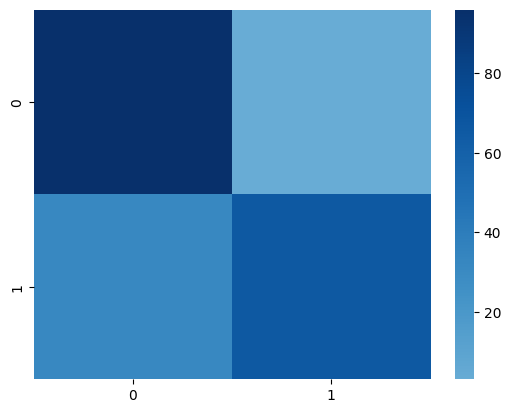

                     Previsão Diagnóstico Negativo  \
Verdadeiro Negativo                             96   
Verdadeiro Positivo                             32   

                     Previsão Diagnóstico Positivo  
Verdadeiro Negativo                              3  
Verdadeiro Positivo                             66  




              precision    recall  f1-score   support

         0.0       0.75      0.97      0.85        99
         1.0       0.96      0.67      0.79        98

    accuracy                           0.82       197
   macro avg       0.85      0.82      0.82       197
weighted avg       0.85      0.82      0.82       197



In [76]:
# Balanced stratified data with features selected by random forest.
train(df_balanced_filtered_after_random_forest, True)

# Conclusão

Por fim, considerando todo o processo de treinamento do modelo e, especialmente, analisando os resultados dos experimentos realizados, podemos retirar conclusões do estudo.

Utilizando como base as métricas definidas no início deste documento, na seção de Objetivo, podemos levantar informações interessantes para a definição do modelo com melhor performance.

Analisando os resultados de `macro_avg` para Acurácia, Precisão, Recall e F1-Score de cada modelo testado, temos a seguinte tabela.

| Cenário | Acurácia | Precisão | Recall | F1-Score |
| :------ | :------: | :------: | :----: | :------: |
| Dados brutos não-estratificados | 0.71 | 0.81 | 0.62 | 0.60 |
| Dados brutos estratificados | 0.78 | 0.88 | 0.66 | 0.67 |
| Dados removendo `id` não-estratificados | 0.94 | 0.93 | 0.94 | 0.94 |
| Dados removendo `id` estratificados | 0.94 | 0.94 | 0.92 | 0.93 |
| Dados removendo `id` e `compacity` não-estratificados | 0.96 | 0.96 | 0.96 | 0.96 |
| Dados removendo `id` e `compacity` estratificados | 0.95 | 0.95 | 0.93 | 0.94 |
| Dados não-estratificados com features selecionadas | 0.95 | 0.94 | 0.95 | 0.94 |
| Dados estratificados com features selecionadas | 0.94 | 0.94 | 0.92 | 0.93 |
| Dados balanceados sem remoção e não-estratificados | 0.79 | 0.85 | 0.79 | 0.78 |
| Dados balanceados sem remoção e estratificados | 0.82 | 0.85 | 0.82 | 0.82 |
| Dados balanceados removendo `id` e não-estratificados | 0.92 | 0.93 | 0.93 | 0.92 |
| Dados balanceados removendo `id` e estratificados | 0.94 | 0.94 | 0.94 | 0.94 |
| Dados balanceados removendo `id` e `compacity` e não-estratificados | 0.94 | 0.94 | 0.94 | 0.94 |
| Dados balanceados removendo `id` e `compacity` e estratificados | 0.92 | 0.93 | 0.92 | 0.92 |
| Dados balanceados, não-estratificados e com seleção de features | 0.79 | 0.85 | 0.79 | 0.78 |
| Dados balanceados, estratificados e com seleção de features| 0.82 | 0.85 | 0.82 | 0.82 |

Assim, a partir dos dados presentes na tabela acima, percebemos que o melhor modelo foi o classificador treinado com os dados originais do *dataset*, porém removendo os atributos de `id` e `compacity` com dados não estratificados, o qual apresenta uma porcetagem de 96% para todas as métricas analisadas. 

Além disso, percebemos que esse caso é um dos poucos casos onde a estratificação dos dados não melhorou o modelo treinado com os dados não-estratificados de acordo com a mesma estratégia de treino. Além deste, o experimento com features selecionadas e o experimento com dados balanceados removendo `id` e `compacity`, também houveram redução de performance para dados estratificados.